<div style="text-align: center;">

# **Colombia EDA for Financial Inclusion Products**

</div>

<div style="text-align: center;">

#### by Daniel Dobrenz

</div>

# Summary

Here, I have an analysis of financial inclusion data for the country of Colombia. 

It's kind of all over the place. I was exploring different options and columns which caused me to discover a lot of things along the way. 

Overall, I wanted to focus on low to middle class incomes and the gender separation in financial products like, savings accounts, consumer loans, and mortgages. 

This notebook comes after I translated the column names from Spanish to English. 

# Import Relevant Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
from IPython.display import Image, display
pd.set_option('display.max_columns', None)

In [9]:
df = pd.read_csv('colombia_financial_inclusion_dataset_translated_cleaned.csv')

In [10]:
df.head().T

0  \
entity_type                                                   1   
entity_code                                                   7   
entity_name                                         Bancolombia   
cutoff_date                                          31/03/2021   
unified_capital                                               1   
...                                                         ...   
total_withdrawal_amount_at_mobile_agents                      0   
number_of_transfers_at_mobile_agents                          0   
total_transfer_amount_at_mobile_agents                        0   
number_of_transactions_and_requests_at_mobile_a...            0   
total_transaction_amount_at_mobile_agents                     0   

                                                                   1  \
entity_type                                                        1   
entity_code                                                       39   
entity_name                                         Banco Davivienda   
cutoff_date                                               31/03/2021   
unified_capital                                                    1   
...                                                              ...   
total_withdrawal_amount_at_mobile_agents                           0   
number_of_transfers_at_mobile_agents                               0   
total_transfer_amount_at_mobile_agents                             0   
number_of_transactions_and_requests_at_mobile_a...                 0   
total_transaction_amount_at_mobile_agents                          0   

                                                                         2  \
entity_type                                                              1   
entity_code                                                             30   
entity_name                                         Banco Caja Social S.A.   
cutoff_date                                                     31/03/2021   
unified_capital                                                          1   
...                                                                    ...   
total_withdrawal_amount_at_mobile_agents                                 0   
number_of_transfers_at_mobile_agents                                     0   
total_transfer_amount_at_mobile_agents                                   0   
number_of_transactions_and_requests_at_mobile_a...                       0   
total_transaction_amount_at_mobile_agents                                0   

                                                                            3  \
entity_type                                                                 1   
entity_code                                                                42   
entity_name                                         Scotiabank Colpatria S.A.   
cutoff_date                                                        31/03/2021   
unified_capital                                                             1   
...                                                                       ...   
total_withdrawal_amount_at_mobile_agents                                    0   
number_of_transfers_at_mobile_agents                                        0   
total_transfer_amount_at_mobile_agents                                      0   
number_of_transactions_and_requests_at_mobile_a...                          0   
total_transaction_amount_at_mobile_agents                                   0   

                                                             4  
entity_type                                                  1  
entity_code                                                 43  
entity_name                                         Banagrario  
cutoff_date                                         31/03/2021  
unified_capital                                              1  
...                                                        ...  
total_withdrawal_amount_at_

## Columns

List out all of the columns so I can reference them as I work on the project.

In [13]:
df.columns

Index(['entity_type', 'entity_code', 'entity_name', 'cutoff_date',
       'unified_capital', 'region_description', 'category_code',
       'category_description', 'type', 'num_agents', 'num_outsourced_agents',
       'num_agents_operational', 'total_num_agents',
       'num_of_deposit_transaction_per_agent',
       'total_deposit_amount_at_physical_agent',
       'num_of_money_transfers_with_agent',
       'total_monetary_value_of_money_transfers_with_agent',
       'num_of_money_transfers_received_with_agent',
       'total_amount_of_money_transfers_received_with_agent',
       'num_of_payments_with_agent', 'total_amount_of_payments_with_agent',
       'num_of_withdrawals_with_agent',
       'total_amount_of_withdrawals_with_agent',
       'number_of_bank_transfers_with_agent',
       'total_bank_transfer_amount_with_agent',
       'num_of_transactions_and_requests_with_agent',
       'total_monetary_value_of_transactions_with_agents',
       'num_of_savings_accounts_up_to_1_minimum_w

In [14]:
# Convert the date column to date time format
df['cutoff_date'] = pd.to_datetime(df['cutoff_date'], dayfirst=True)

Sort the dataframe by DATE.

In [16]:
# Sort the dataframe by time
df.sort_values(by='cutoff_date', inplace=True)

# MAP

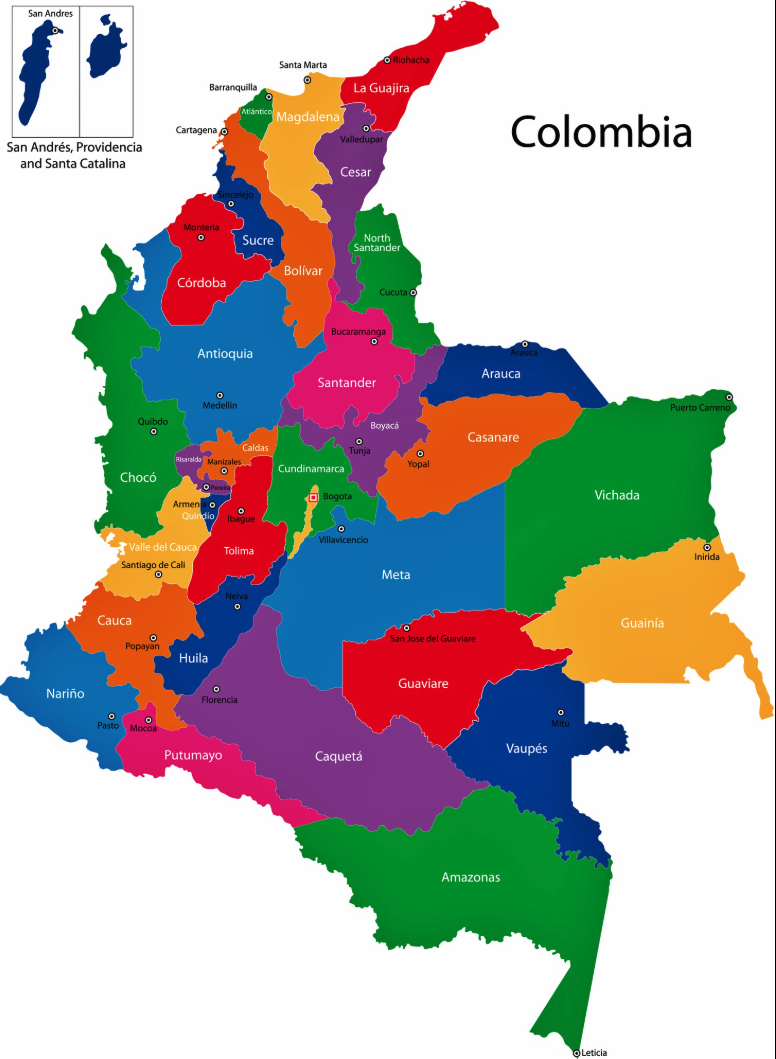

In [18]:
display(Image(filename='map_of_regions_colombia.png', width=500))

Got a map of Colombia with the regions highlighted so I can get a visual representation of whats happening across the country.

Plot the frequency of entries by region so we can see which regions have the most data. 

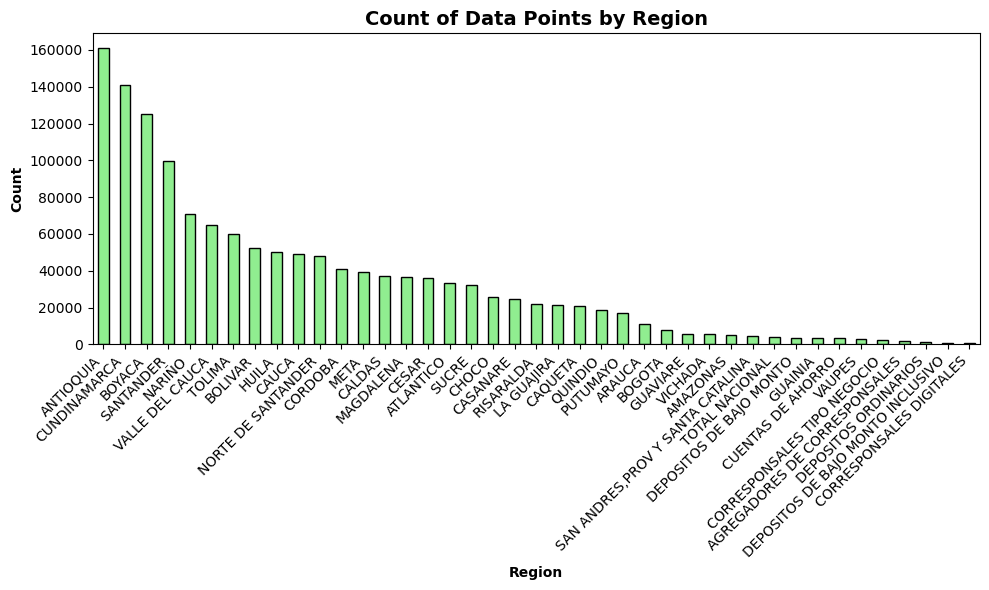

In [21]:
# Bar chart for the frequency of region values
plt.figure(figsize=(10, 6))
region_counts = df['region_description'].value_counts()
region_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Count of Data Points by Region', fontweight='bold', fontsize=14)
plt.xlabel('Region', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Observations:**
- Antioquia and Cundinamarca have the highest number of data points, both exceeding 40,000 records.
- Regions like San Andres, Prov. y Santa Catalina and Valle del Cauca have lower counts, but still show significant data representation.
- The regions at the far right (such as Depositos de Corresponsales Digitales, Cuentas de Bajo Monto, and Depositos de Bajo Monto Inlcuivo) have very low data counts, which suggests they may represent either specialized or less frequently recorded data.

It makes sense that the highest count of data points is Antioquia, because it has the biggest city.

# Consumer Loans for Men and Women

Let's look at consumer loans. 

I think this is something good to look at because the ability to get a consumer loan is reflective of someone being able to pay it back, which shows financial competence and discipline. 

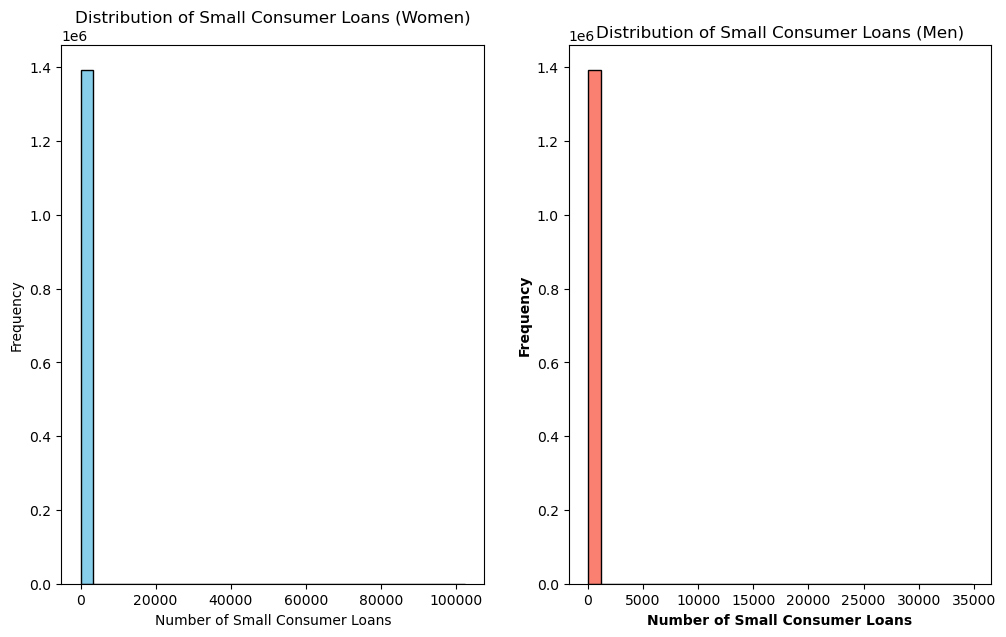

In [25]:
# Plot histogram for 'number_of_small_consumer_loans_women' and 'number_of_small_consumer_loans_men'
plt.figure(figsize=(12, 7))

# Histogram for women
plt.subplot(1, 2, 1)
plt.hist(df['number_of_small_consumer_loans_women'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Small Consumer Loans (Women)')
plt.xlabel('Number of Small Consumer Loans')
plt.ylabel('Frequency')

# Histogram for men
plt.subplot(1, 2, 2)
plt.hist(df['number_of_small_consumer_loans_men'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Small Consumer Loans (Men)')
plt.xlabel('Number of Small Consumer Loans', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')

plt.show()

So, there aren't that many loans given out. I want to eliminate the zero value so I can get a better understanding of what loans that are given out. 

Filter out the low values so they don't skew the graph. 

By trial and error I found using 100 to be a good threshold value.

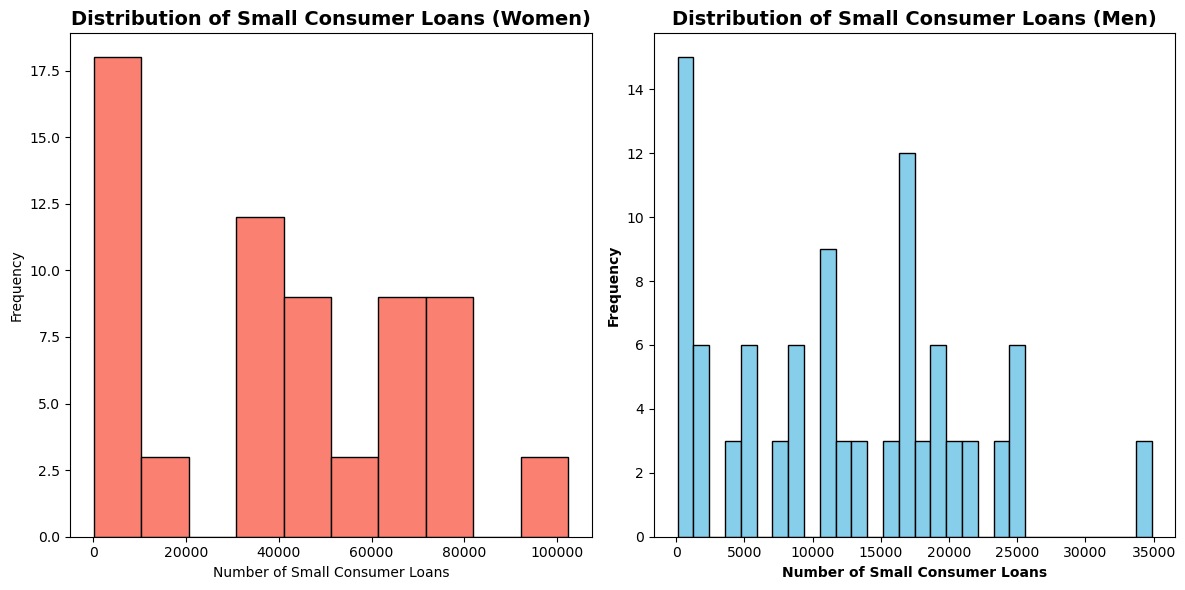

In [28]:
# Filter out lower values for both women and men
filtered_women = df[df['number_of_small_consumer_loans_women'] > 100]
filtered_men = df[df['number_of_small_consumer_loans_men'] > 100]

# Plotting the distribution without zero values
plt.figure(figsize=(12, 6))

# Histogram for women (without zero values)
plt.subplot(1, 2, 1)
plt.hist(filtered_women['number_of_small_consumer_loans_women'], bins=10, color='salmon', edgecolor='black')
plt.title('Distribution of Small Consumer Loans (Women)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Small Consumer Loans')
plt.ylabel('Frequency')

# Histogram for men (without zero values)
plt.subplot(1, 2, 2)
plt.hist(filtered_men['number_of_small_consumer_loans_men'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Small Consumer Loans (Men)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Small Consumer Loans', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')

plt.tight_layout()
plt.show()

**Key Points**
1. X-Axis (Number of Loans)
    - Women’s range: roughly 0–100,000
    - Men’s range: roughly 0–35,000
2. Y-Axis (Frequency)
    - Shows how many regions/observations fall within each loan-count bin.
3. Shape and Spread
    - Both distributions are right-skewed—most observations are on the lower end, with a long tail to the right.
    - Women’s distribution extends to a much higher maximum (near 100k). Men’s distribution peaks around lower counts (under ~15k), though it also reaches up to 35k.
4. Peaks
    - Women: The highest frequency bin is around 0–20k, with frequencies reaching nearly 18–19.
    - Men: The most common range is also in the lower bins (up to ~15k), with a peak frequency around 14.

Overall, while both groups have most observations in lower ranges, women’s loan counts can reach significantly higher levels, creating a wider spread in their distribution.

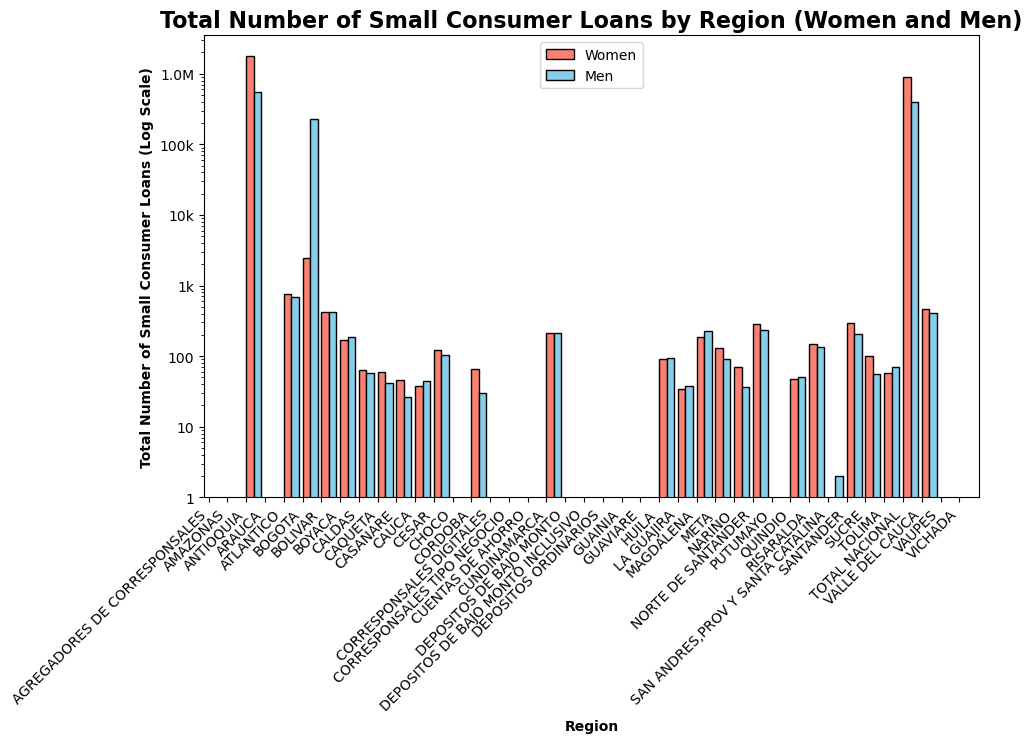

In [30]:
# Group the data
region_loans = df.groupby('region_description')[
    ['number_of_small_consumer_loans_women', 'number_of_small_consumer_loans_men']
].sum()

# Plot with log scale
ax = region_loans.plot(
    kind='bar',
    width=0.8,
    position=0,
    color=['salmon', 'skyblue'],
    edgecolor='black',
    figsize=(10, 6)
)

# Set log scale
ax.set_yscale('log')

# Custom formatter for human-readable log scale
def human_log_format(x, pos):
    if x == 0:
        return "0"
    elif x >= 1_000_000:
        return f'{x*1.0/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x*1.0/1_000:.0f}k'
    else:
        return f'{int(x)}'

# Apply custom formatter
ax.yaxis.set_major_formatter(FuncFormatter(human_log_format))

# Optional: Set specific y-ticks at clean log steps
ticks = [1, 10, 100, 1_000, 10_000, 100_000, 1_000_000]
ax.set_yticks(ticks)

# Set labels and title
plt.title('Total Number of Small Consumer Loans by Region (Women and Men)', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontweight='bold')
plt.ylabel('Total Number of Small Consumer Loans (Log Scale)', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(['Women', 'Men'])
plt.show()


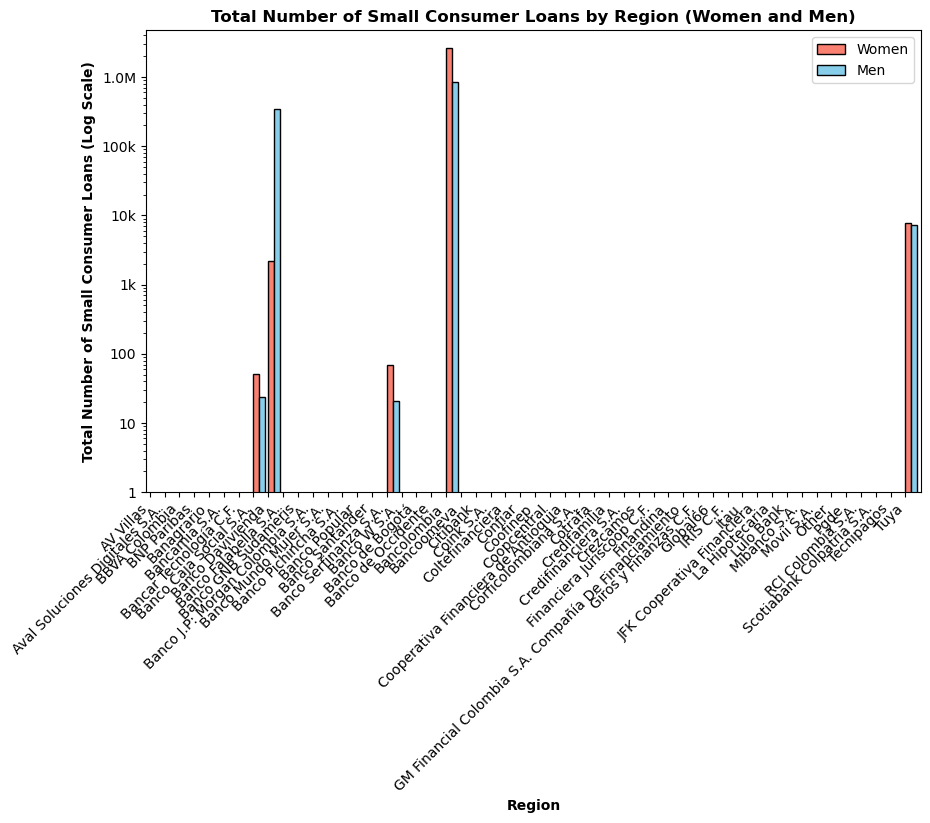

In [31]:
# Group the data
region_loans = df.groupby('entity_name')[
    ['number_of_small_consumer_loans_women', 'number_of_small_consumer_loans_men']
].sum()

ax = region_loans.plot(
    kind='bar',
    width=0.8,
    position=0,
    color=['salmon', 'skyblue'],
    edgecolor='black',
    figsize=(10, 6)
)

# Set the y-axis to a logarithmic scale (this helps visualize most of the data, some
# values are really high and some really low)
ax.set_yscale('log')

# Custom formatter for human-readable log scale
def human_log_format(x, pos):
    if x == 0:
        return "0"
    elif x >= 1_000_000:
        return f'{x*1.0/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x*1.0/1_000:.0f}k'
    else:
        return f'{int(x)}'

# Apply custom formatter
ax.yaxis.set_major_formatter(FuncFormatter(human_log_format))

# Optional: Set specific y-ticks at clean log steps
ticks = [1, 10, 100, 1_000, 10_000, 100_000, 1_000_000]
ax.set_yticks(ticks)

plt.title('Total Number of Small Consumer Loans by Region (Women and Men)', fontsize=12, fontweight='bold')
plt.xlabel('Region', fontweight='bold')
plt.ylabel('Total Number of Small Consumer Loans (Log Scale)', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(['Women', 'Men'])
# plt.tight_layout()
plt.show()

**Observations:**
- There are significant variations across regions, with certain regions having very high numbers of small consumer loans for women (such as Amazonas and Atlántico) compared to men.
- In some regions, the number of loans for men and women is similar, while in others, one gender has a notably higher number of loans.
- There are alot of regions with very low numbers of loans for both men AND women.

This graph is useful for comparing the distribution of small consumer loans between genders across various regions. It highlights where the gender disparity in small loans is more prominent.

# Mortgages by Gender 

### Mortgage Loans by Bank Name

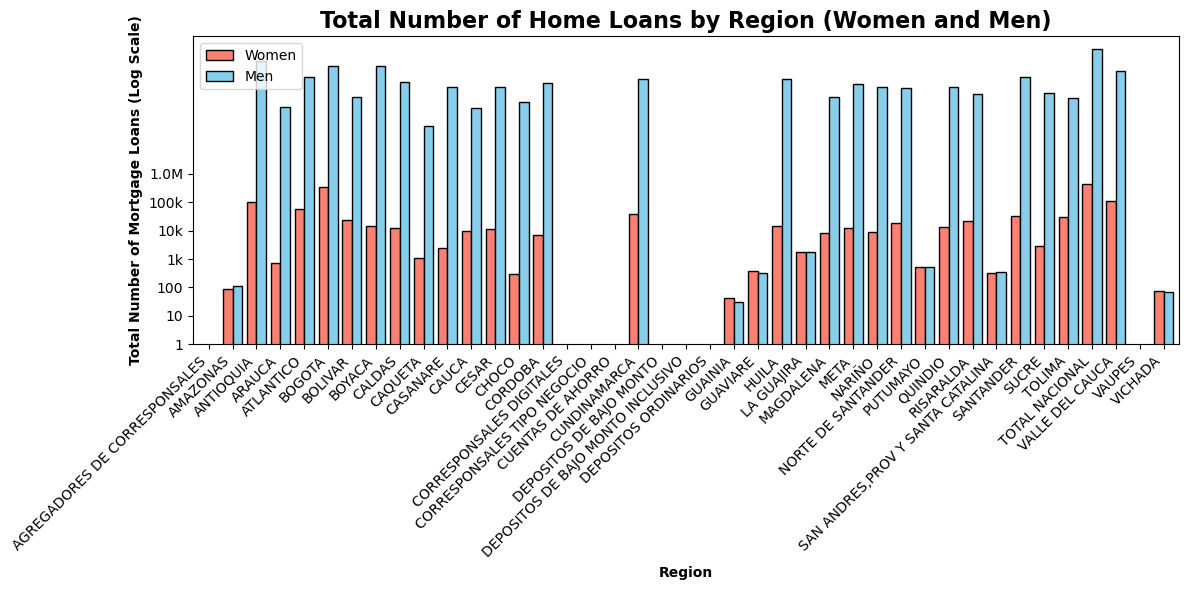

In [35]:
# Group the data
entity_mortgage_loans = df.groupby('region_description')[
    ['number_of_housing_loans_women', 'number_of_housing_loans_men']].sum()


# Create the bar plot with bars centered on the ticks
ax = entity_mortgage_loans.plot(
    kind='bar',
    width=0.8,
    align='center',       # Centers the bars on the tick positions
    color=['salmon', 'skyblue'],
    edgecolor='black',
    figsize=(12, 6)
)

# Set the y-axis to a logarithmic scale
ax.set_yscale('log')

# Custom formatter for human-readable log scale
def human_log_format(x, pos):
    if x == 0:
        return "0"
    elif x >= 1_000_000:
        return f'{x*1.0/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x*1.0/1_000:.0f}k'
    else:
        return f'{int(x)}'

# Apply custom formatter
ax.yaxis.set_major_formatter(FuncFormatter(human_log_format))

# Optional: Set specific y-ticks at clean log steps
ticks = [1, 10, 100, 1_000, 10_000, 100_000, 1_000_000]
ax.set_yticks(ticks)

plt.title('Total Number of Home Loans by Region (Women and Men)', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontweight='bold')
plt.ylabel('Total Number of Mortgage Loans (Log Scale)', fontweight='bold')

# Manually set xticks to match the center of the bar groups
ax.set_xticks(np.arange(len(entity_mortgage_loans.index)))
ax.set_xticklabels(entity_mortgage_loans.index, rotation=45, ha='right')

plt.legend(['Women', 'Men'])
plt.tight_layout()
plt.show()


In [36]:
df['number_of_housing_loans_men'].value_counts()

number_of_housing_loans_men
0       1370395
1          4013
2          2562
3          1719
4          1355
         ...   
1896          1
1289          1
697           1
763           1
261           1
Name: count, Length: 881, dtype: int64

In [37]:
df['number_of_housing_loans'].value_counts()

number_of_housing_loans
0       1367699
1          3590
2          2205
3          1619
4          1428
         ...   
7901          1
1033          1
5823          1
1800          1
1642          1
Name: count, Length: 1075, dtype: int64

In [38]:
pd.set_option('display.max_columns', None)

In [39]:
df['number_of_housing_loans'].value_counts()

number_of_housing_loans
0       1367699
1          3590
2          2205
3          1619
4          1428
         ...   
7901          1
1033          1
5823          1
1800          1
1642          1
Name: count, Length: 1075, dtype: int64

In [40]:
entity_mortgage_loans

number_of_housing_loans_women  \
region_description                                                 
AGREGADORES DE CORRESPONSALES                                  0   
AMAZONAS                                                      86   
ANTIOQUIA                                                 101922   
ARAUCA                                                       726   
ATLANTICO                                                  58868   
BOGOTA                                                    338676   
BOLIVAR                                                    24106   
BOYACA                                                     14134   
CALDAS                                                     12200   
CAQUETA                                                     1102   
CASANARE                                                    2516   
CAUCA                                                       9352   
CESAR                                                      11082   
CHOCO                                                        288   
CORDOBA                                                     6876   
CORRESPONSALES DIGITALES                                       0   
CORRESPONSALES TIPO NEGOCIO                                    0   
CUENTAS DE AHORRO                                              0   
CUNDINAMARCA                                               39324   
DEPOSITOS DE BAJO MONTO                                        0   
DEPOSITOS DE BAJO MONTO INCLUSIVO                              0   
DEPOSITOS ORDINARIOS                                           0   
GUAINIA                                                       42   
GUAVIARE                                                     394   
HUILA                                                      14158   
LA GUAJIRA                                                  1768   
MAGDALENA                                                   8160   
META                                                       12492   
NARIÑO                                                      9176   
NORTE DE SANTANDER                                         19258   
PUTUMAYO                                                     532   
QUINDIO                                                    13446   
RISARALDA                                                  22356   
SAN ANDRES,PROV Y SANTA CATALINA                             314   
SANTANDER                                                  32818   
SUCRE                                                       2796   
TOLIMA                                                     30324   
TOTAL NACIONAL                                            451825   
VALLE DEL CAUCA                                           114296   
VAUPES                                                         0   
VICHADA                                                       78   

                                   number_of_housing_loans_men  
region_description                                              
AGREGADORES DE CORRESPONSALES                                0  
AMAZONAS                                                   112  
ANTIOQUIA                                           9444811862  
ARAUCA                                               224000656  
ATLANTICO                                           2548898502  
BOGOTA                                              6001409078  
BOLIVAR                                              487023966  
BOYACA                                              6105630478  
CALDAS                                              1690013492  
CAQUETA                                               50001224  
CASANARE                                            1168794354  
CAUCA                                                214008642  
CESAR                                               1178410876  
CHOCO                                                334396224  
CORDOBA                                             1518508522  
CORRE

There's something wrong with the mortgages values for men. Some of the values in the column are not the total number of loans but the value of loans. It looks like one column got mixed up with another column. 

In [42]:
# Create a new column to break down by year
df['year'] = pd.to_datetime(df['cutoff_date']).dt.year

In [43]:
# Export the added columns to a new dataframe 
df.to_csv('colombia_financial_inclusion_dataset_translated_cleaned_columns_added.csv')

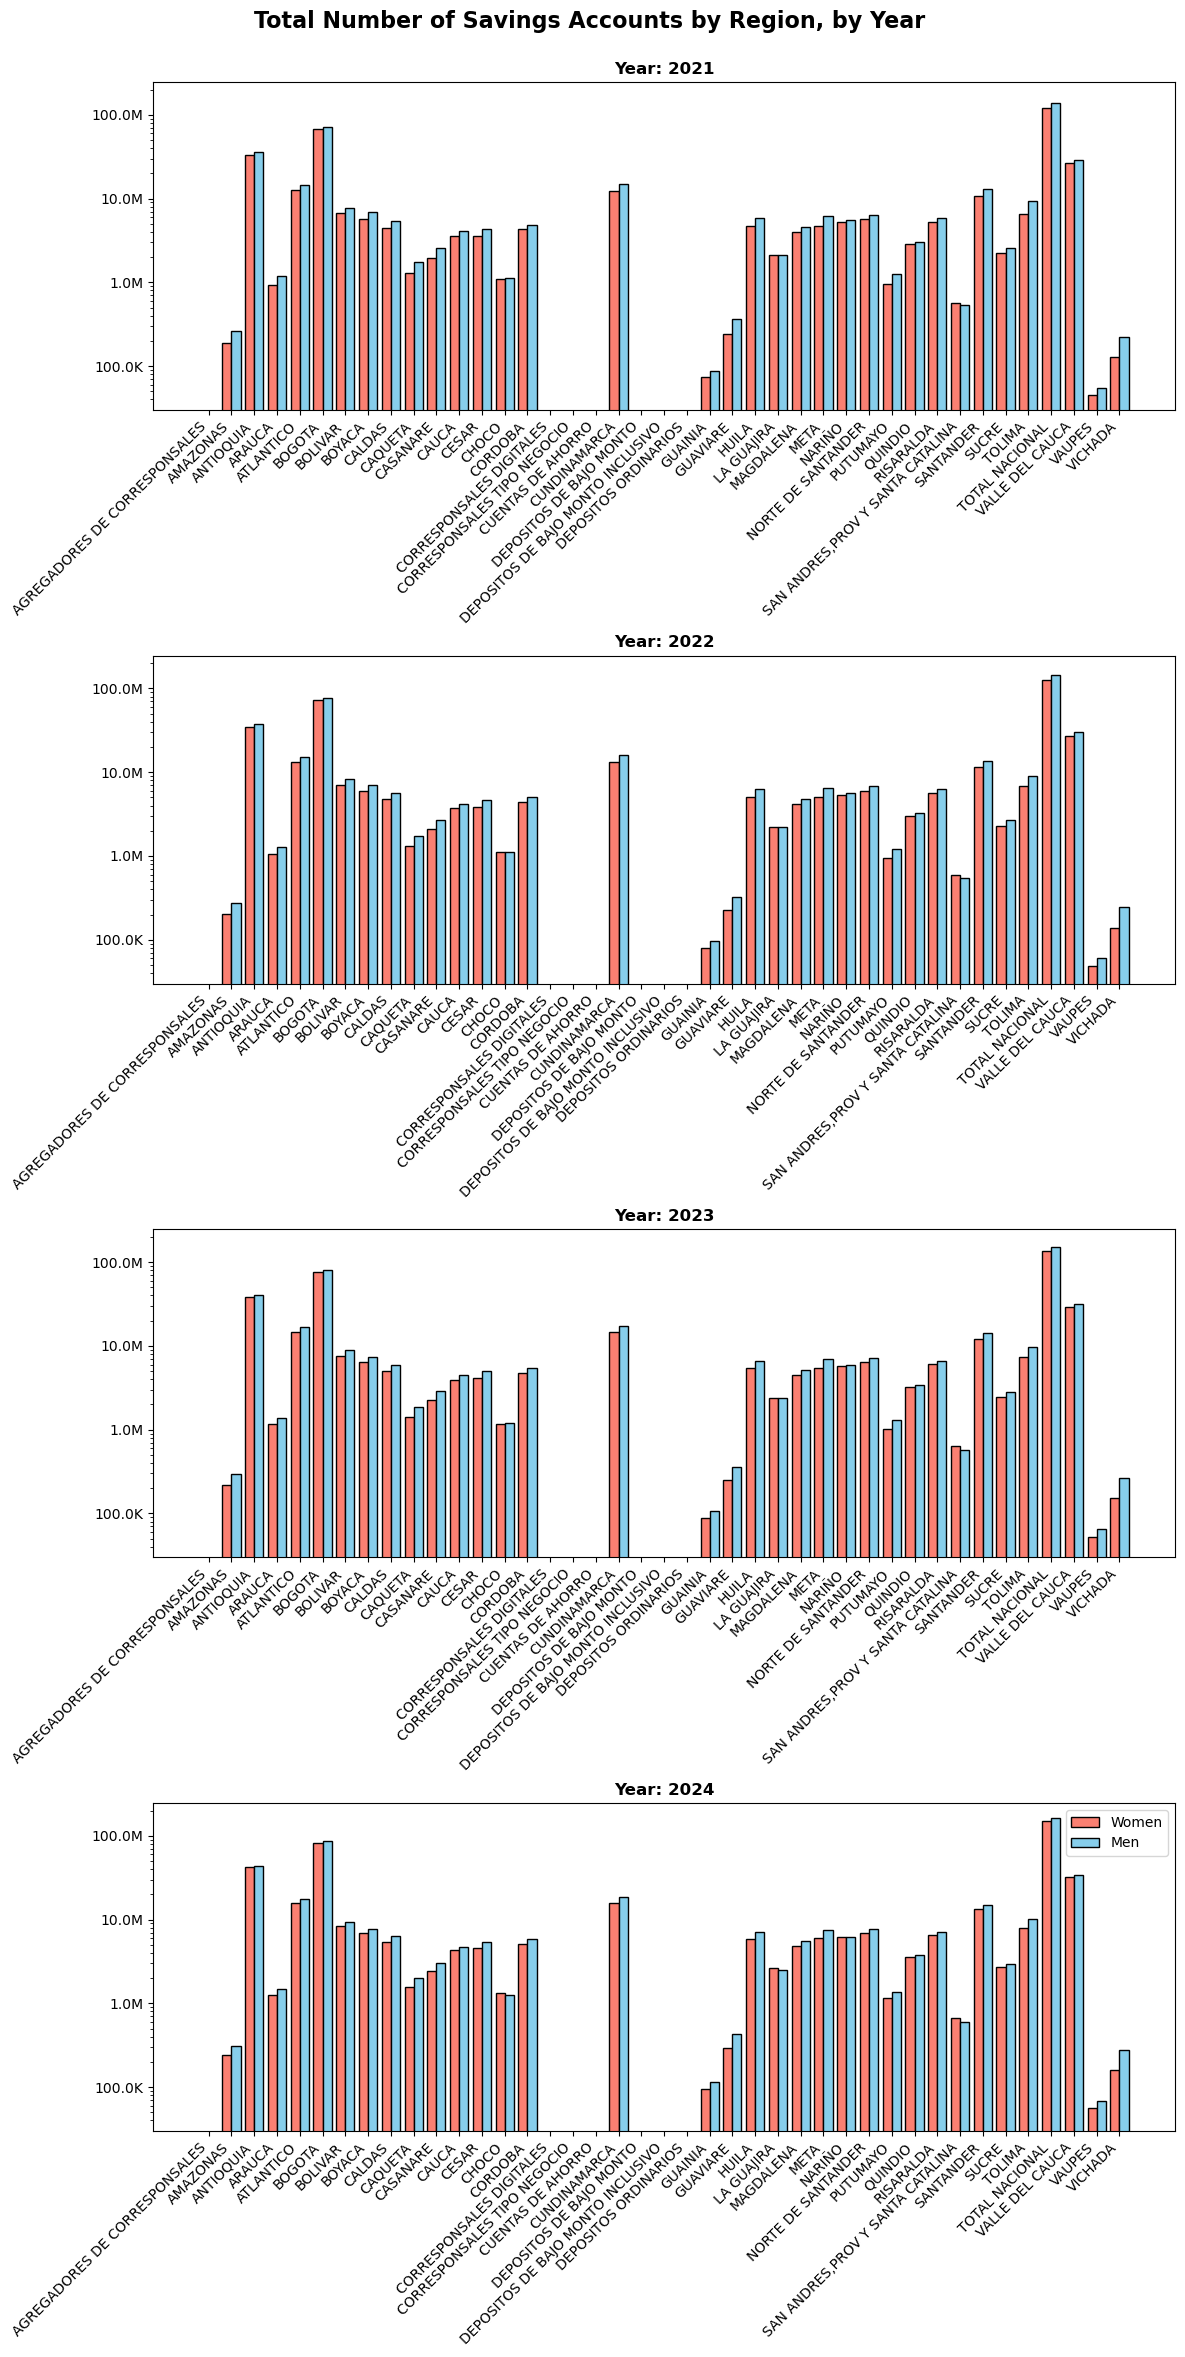

In [44]:
# Group and sum by region & year
grouped = df.groupby(['region_description', 'year'])[
    ['number_of_savings_accounts_women', 'number_of_savings_accounts_men']
].sum()

# Sort the index so regions and years are in a consistent order
grouped.sort_index(inplace=True)

# Extract the unique years to create one subplot per year
unique_years = sorted(df['year'].unique())

fig, axes = plt.subplots(nrows=len(unique_years), ncols=1, figsize=(12, 6 * len(unique_years)), sharey=True)

for ax, year in zip(axes, unique_years):
    # Cross-section for the given year
    data_year = grouped.xs(year, level='year')
    
    # Plot grouped bars: positions for x-axis
    x_positions = np.arange(len(data_year.index))
    bar_width = 0.4
    
    ax.bar(
        x_positions - bar_width/2, 
        data_year['number_of_savings_accounts_women'], 
        width=bar_width, 
        label='Women', 
        color='salmon',
        edgecolor='black'
    )
    ax.bar(
        x_positions + bar_width/2, 
        data_year['number_of_savings_accounts_men'], 
        width=bar_width, 
        label='Men', 
        color='skyblue',
        edgecolor='black'
    )
    
    ax.set_xticks(x_positions)
    ax.set_xticklabels(data_year.index, rotation=45, ha='right')
    ax.set_title(f'Year: {year}', fontweight='bold')
    ax.set_yscale('log')  # Keep log scale if you need it
    
# Define a custom formatter function
def human_readable_format(value, tick_position):
    """
    Convert numeric values to human-readable strings:
      1,000 -> '1K'
      1,500 -> '1.5K'
      1,000,000 -> '1M'
    """
    if value == 0:
        return "0"
    # For large or small values, you can adapt this logic:
    abs_value = abs(value)
    if abs_value >= 1e9:
        return f"{value/1e9:.1f}B"
    elif abs_value >= 1e6:
        return f"{value/1e6:.1f}M"
    elif abs_value >= 1e3:
        return f"{value/1e3:.1f}K"
    else:
        return str(int(value))

# Apply the custom formatter to the y-axis
ax.yaxis.set_major_formatter(mticker.FuncFormatter(human_readable_format))
ax.legend()

fig.suptitle('Total Number of Savings Accounts by Region, by Year', fontsize=16, fontweight='bold')
fig.tight_layout()
# Increase the top margin to create extra space
fig.subplots_adjust(top=0.95)

# Export the graph to a PNG file with high resolution
plt.savefig("total_num_saving_account_region_year.png", dpi=300, bbox_inches="tight")

plt.show()

Overall, men have just a slightly higher number of savings accounts than women. You can't really see it by the graphs. But, if you look below, you can see that the total number of savings accounts for BOTH men and women increase every year. 

In [46]:
grouped.T

region_description               AGREGADORES DE CORRESPONSALES                 \
year                                                      2021 2022 2023 2024   
number_of_savings_accounts_women                             0    0    0    0   
number_of_savings_accounts_men                               0    0    0    0   

region_description               AMAZONAS                         ANTIOQUIA  \
year                                 2021    2022    2023    2024      2021   
number_of_savings_accounts_women   190548  202366  219828  241682  32930290   
number_of_savings_accounts_men     262670  276904  296560  308598  35711954   

region_description                                               ARAUCA  \
year                                  2022      2023      2024     2021   
number_of_savings_accounts_women  35142374  37975036  42113248   937214   
number_of_savings_accounts_men    37784076  40668722  44238010  1173574   

region_description                                          ATLANTICO  \
year                                 2022     2023     2024      2021   
number_of_savings_accounts_women  1046626  1154674  1267276  12530778   
number_of_savings_accounts_men    1285088  1397050  1485074  14433634   

region_description                                                BOGOTA  \
year                                  2022      2023      2024      2021   
number_of_savings_accounts_women  13324768  14501846  15606306  67908930   
number_of_savings_accounts_men    15354672  16618640  17483798  72103568   

region_description                                              BOLIVAR  \
year                                  2022      2023      2024     2021   
number_of_savings_accounts_women  71991428  76728464  81198832  6795510   
number_of_savings_accounts_men    76384454  81680624  86725564  7768654   

region_description                                            BOYACA           \
year                                 2022     2023     2024     2021     2022   
number_of_savings_accounts_women  7111092  7663332  8321948  5754560  5961342   
number_of_savings_accounts_men    8241072  8861922  9299106  6850848  6970248   

region_description                                   CALDAS                    \
year                                 2023     2024     2021     2022     2023   
number_of_savings_accounts_women  6377214  6886108  4470148  4734830  5063776   
number_of_savings_accounts_men    7437340  7802378  5344030  5606712  5985110   

region_description                         CAQUETA                             \
year                                 2024     2021     2022     2023     2024   
number_of_savings_accounts_women  5471380  1277912  1322770  1435832  1588286   
number_of_savings_accounts_men    6319348  1769976  1739390  1876562  1988540   

region_description               CASANARE                               CAUCA  \
year                                 2021     2022     2023     2024     2021   
number_of_savings_accounts_women  1968672  2077846  2265840  2454440  3584390   
number_of_savings_accounts_men    2589448  2689462  2884356  3060820  4139862   

region_description                                             CESAR           \
year                                 2022     2023     2024     2021     2022   
number_of_savings_accounts_women  3712988  3967084  4341438  3617078  3835668   
number_of_savings_accounts_men    4221718  4466556  4763306  4351626  4640064   

region_description                                    CHOCO                    \
year                                 2023     2024     2021     2022     2023   
number_of_savings_accounts_women  4149090  4525446  1105616  1105880  1185154   
number_of_savings_accounts_men    5002554  5343090  1138396  1115696  1193518   

region_description                         CORDOBA                             \
year                                 2024     2021     2022     2023     2024   
number_of_savings_accounts_women  1316098  428

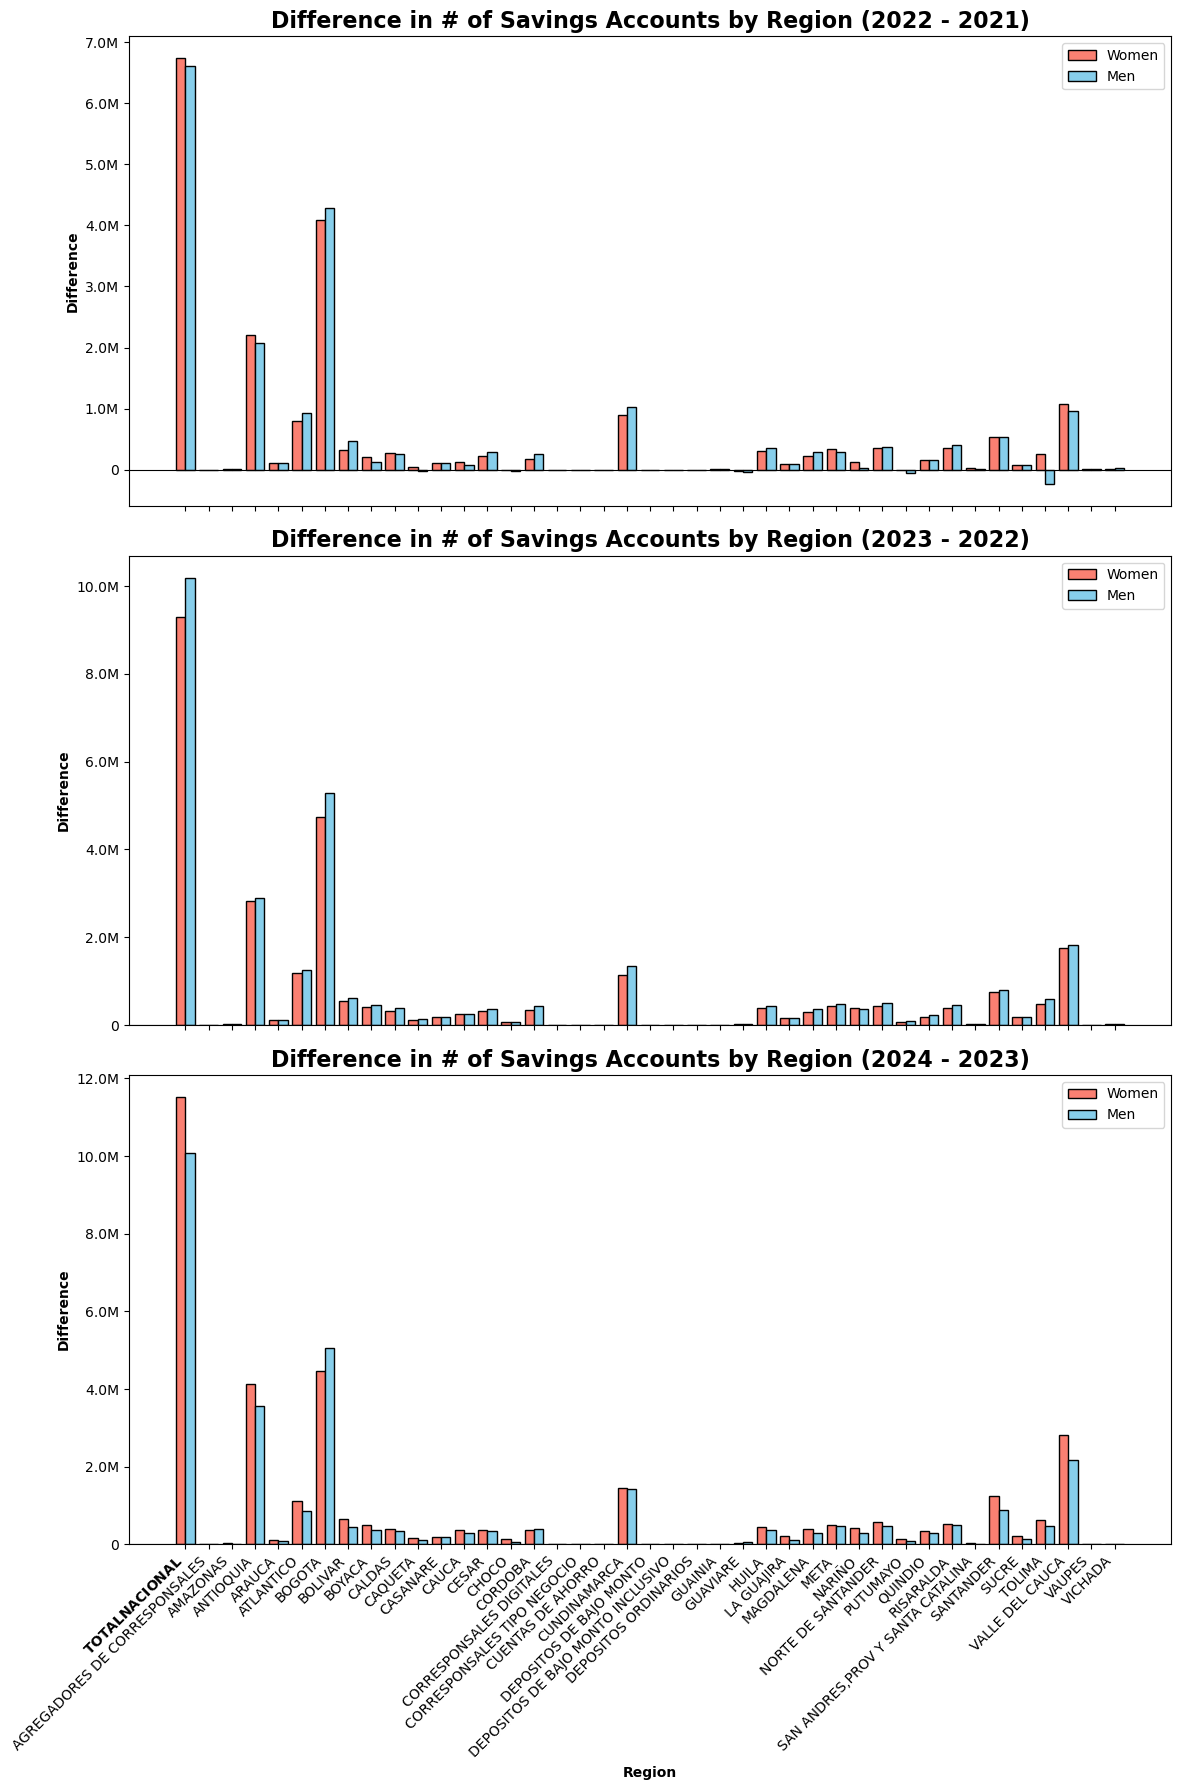

In [47]:
# Group the data by region and year using sum
grouped = df.groupby(['region_description', 'year'])[
    ['number_of_savings_accounts_women', 'number_of_savings_accounts_men']
].sum()

# Pivot so that each region is a row and each year is a column for each account type
pivoted = grouped.unstack(level='year', fill_value=0)

# Reorder the Index so "TOTAL NACIONAL" is First
current_index = list(pivoted.index)
if "TOTAL NACIONAL" in current_index:
    new_index = ["TOTAL NACIONAL"] + [idx for idx in current_index if idx != "TOTAL NACIONAL"]
    pivoted = pivoted.reindex(new_index)

# -------------------------
# Define the year pairs for which you want to compute differences
# -------------------------
year_pairs = [(2021, 2022), (2022, 2023), (2023, 2024)]

# Create subplots: one row per year pair
fig, axes = plt.subplots(nrows=len(year_pairs), ncols=1, figsize=(12, 6 * len(year_pairs)), sharex=True)

# Ensure axes is always a list (even if there's only one subplot)
if len(year_pairs) == 1:
    axes = [axes]

# Loop through each year pair and plot the differences
for ax, (year1, year2) in zip(axes, year_pairs):
    # Compute the differences: (year2 - year1)
    diff_women = pivoted['number_of_savings_accounts_women'][year2] - pivoted['number_of_savings_accounts_women'][year1]
    diff_men   = pivoted['number_of_savings_accounts_men'][year2] - pivoted['number_of_savings_accounts_men'][year1]
    
    # X positions for each region
    indices = np.arange(len(pivoted.index))
    bar_width = 0.4
    
    # Plot the bars
    ax.bar(indices - bar_width/2, diff_women, bar_width, label='Women', color='salmon',edgecolor='black')
    ax.bar(indices + bar_width/2, diff_men, bar_width, label='Men', color='skyblue', edgecolor='black')
    
    # Add a horizontal line at 0 for reference
    ax.axhline(0, color='black', linewidth=0.8)
    
    # Apply the custom formatter to the y-axis
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(human_readable_format))
    
    # Set subplot title and labels
    ax.set_title(f'Difference in # of Savings Accounts by Region ({year2} - {year1})', fontsize=16, fontweight='bold')
    ax.set_ylabel('Difference', fontweight='bold')
    ax.legend()
    # Build a list of labels, and make 'TOTAL NACIONAL' bold using LaTeX formatting
    xtick_labels = []
    for label in pivoted.index:
        if label == "TOTAL NACIONAL":
            label_str = r"$\bf{" + label + "}$"
            formatted_label = label.replace(" ", r"\ ")
        else:
            label_str = label
        xtick_labels.append(label_str)
    ax.set_xticks(indices)
    ax.set_xticklabels(xtick_labels, rotation=45, ha='right')
    

plt.xlabel('Region', fontweight='bold')
plt.tight_layout()
plt.show()

# Optional: Save the combined figure to a file
fig.savefig("year_to_year_differences_savings_accounts_region.png", dpi=300, bbox_inches="tight")


Each of these plots shows the difference in the number of savings accounts for Women and Men across the different regions. Maybe, we can look at what regions are looking like their adding savings accounts more consistently or look at regions that are declining. Those could also be an opportunity for financial product offerings. 

Total Nacional is good to look at for overall differences. 

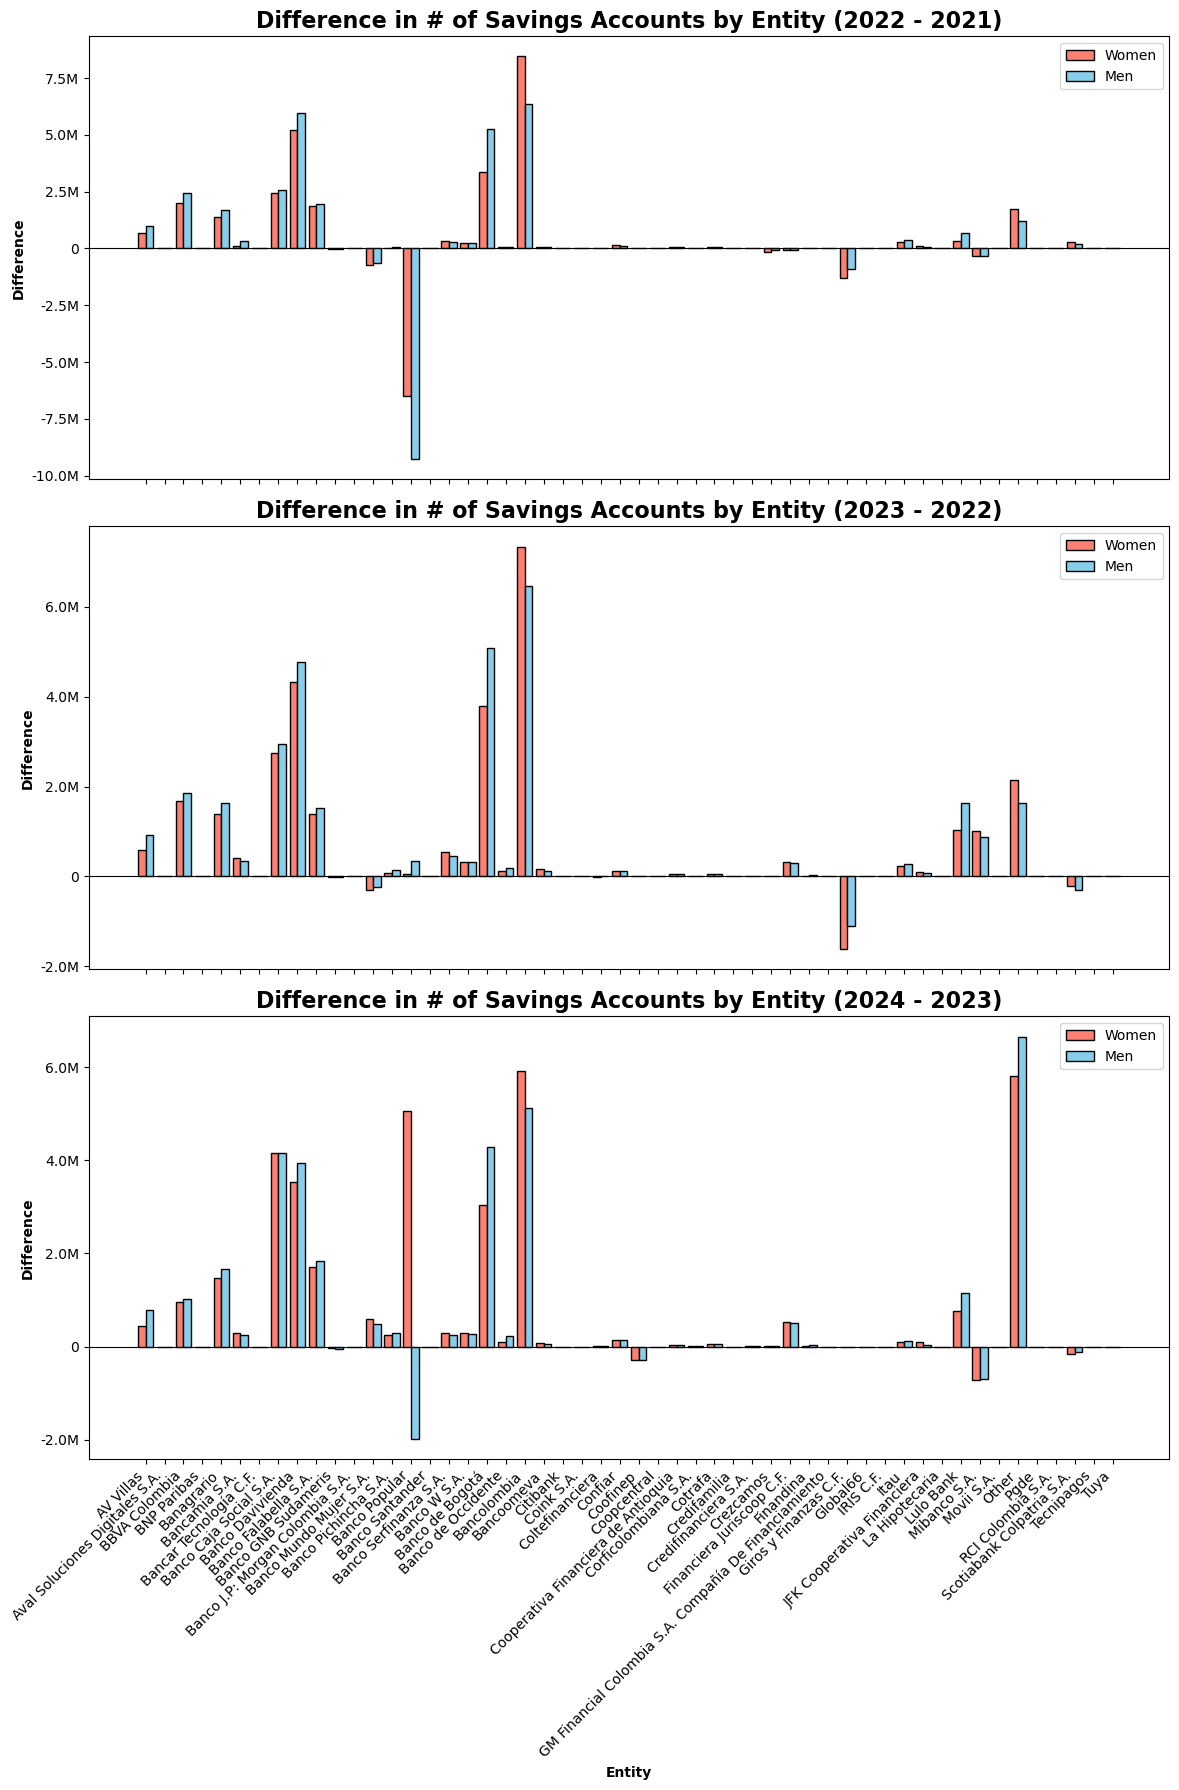

In [49]:
# Group the data by region and year using sum (or count, as needed)
grouped = df.groupby(['entity_name', 'year'])[
    ['number_of_savings_accounts_women', 'number_of_savings_accounts_men']
].sum()

# Pivot so that each region is a row and each year is a column for each loan type
pivoted = grouped.unstack(level='year', fill_value=0)

# -------------------------
# Define the year pairs for which you want to compute differences
# -------------------------
year_pairs = [(2021, 2022), (2022, 2023), (2023, 2024)]

# Create subplots: one row per year pair
fig, axes = plt.subplots(nrows=len(year_pairs), ncols=1, figsize=(12, 6 * len(year_pairs)), sharex=True)

# Ensure axes is always a list (even if there's only one subplot)
if len(year_pairs) == 1:
    axes = [axes]

# Loop through each year pair and plot the differences
for ax, (year1, year2) in zip(axes, year_pairs):
    # Compute the differences: (year2 - year1)
    diff_women = pivoted['number_of_savings_accounts_women'][year2] - pivoted['number_of_savings_accounts_women'][year1]
    diff_men   = pivoted['number_of_savings_accounts_men'][year2] - pivoted['number_of_savings_accounts_men'][year1]
    
    # X positions for each region
    indices = np.arange(len(pivoted.index))
    bar_width = 0.4
    
    # Plot the bars
    ax.bar(indices - bar_width/2, diff_women, bar_width, label='Women', color='salmon', edgecolor='black')
    ax.bar(indices + bar_width/2, diff_men, bar_width, label='Men', color='skyblue', edgecolor='black')
    
    # Add a horizontal line at 0 for reference
    ax.axhline(0, color='black', linewidth=0.8)
    
    # Apply the custom formatter to the y-axis
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(human_readable_format))
    
    # Set subplot title and labels
    ax.set_title(f'Difference in # of Savings Accounts by Entity ({year2} - {year1})', fontsize=16, fontweight='bold')
    ax.set_ylabel('Difference', fontweight='bold')
    # Build a list of labels, and make 'TOTAL NACIONAL' bold using LaTeX formatting
    xtick_labels = []
    for label in pivoted.index:
        if label == "TOTAL NACIONAL":
            label_str = r"$\bf{" + label + "}$"
            formatted_label = label.replace(" ", r"\ ")
        else:
            label_str = label
        xtick_labels.append(label_str)
    ax.set_xticks(indices)
    ax.set_xticklabels(xtick_labels, rotation=45, ha='right')
    ax.legend()
    ax.set_xticks(indices)
    ax.set_xticklabels(pivoted.index, rotation=45, ha='right')

plt.xlabel('Entity', fontweight='bold')
plt.tight_layout()
plt.show()

# Optional: Save the combined figure to a file
fig.savefig("year_to_year_differences_savings_accounts_entity.png", dpi=300, bbox_inches="tight")


Total Nacional shows the biggest differences in number of savings account changes over the years. Some years had small gains and some years had huge gains. It would be interesting to see what was going on the the years of decline versus the years of gain. 

Bancolombia, Banco de Bogota and Banco Caja Social and some others consistently show growth across all years. 

There is another category called 'other' that isn't seen in the other graphs. It showed significant gains from 2023 to 2024. I wonder if it is an online bank, or other bank that is outside the country. 

Most of the large banks show consistent growth over the years. 

Women and Men have parallet patterns. When an institution grows for Men, is usually grows for women too. The only difference is the magnitude. 

There are some notable declines. Banco Popular shows significant decline in mens savings accounts in 2023 to 2024 and from 2021 to 2022 both men and womens savings accounts declined significantly. I wonder what happened? Did something happen to the bank? or didn't they move to a different institution? 

# Lower to Middle Class Stats

In [52]:
# Convert the peso to USD for easier interpretability
# Get the current exchange rate
exchange_rate = 4142

# Create a new column in USD
df['balance_of_savings_accounts_greater_than_1_minimum_wage_up_to_3_minimum_wages_USD'] = (df['balance_of_savings_accounts_greater_than_1_minimum_wage_up_to_3_minimum_wages'] / exchange_rate).round(2)

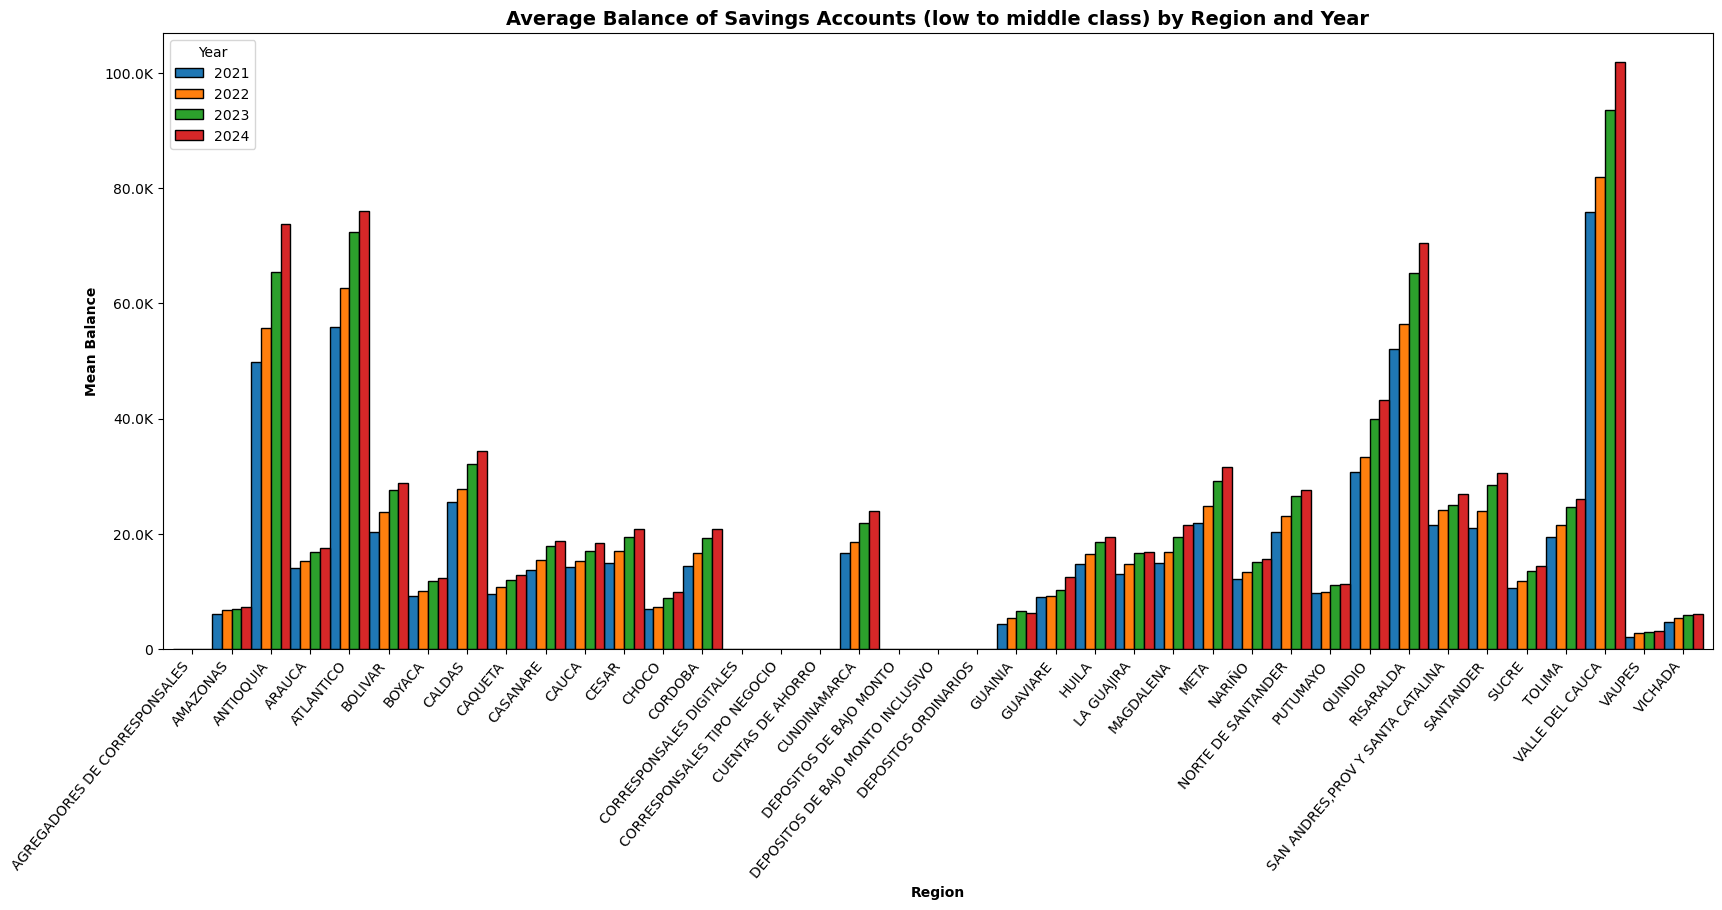

In [53]:
# Drop the total nacional and bogota column because they skew the rest of the data too much
# List of regions to drop
regions_to_drop = ['TOTAL NACIONAL', 'BOGOTA']

# Filter out those regions using .isin() and the negation operator (~)
df_filtered = df[~df['region_description'].isin(regions_to_drop)]

# Group the data and calculate the mean for the specified column
grouped = df_filtered.groupby(['region_description', 'year'])[
    'balance_of_savings_accounts_greater_than_1_minimum_wage_up_to_3_minimum_wages_USD'
].mean()

# Pivot the grouped result so that each region is a row and each year is a column
pivoted = grouped.unstack(level='year')

# Plot the data as a grouped bar chart
ax = pivoted.plot(kind='bar', figsize=(20, 8), width=1, edgecolor='black')
# Explicitly set tick positions: one per region
ax.set_xticks(np.arange(len(pivoted.index)))
# Then set the tick labels to be the region names with rotation
ax.set_xticklabels(pivoted.index, rotation=45, ha='right')
# Apply the custom formatter to the y-axis
ax.yaxis.set_major_formatter(mticker.FuncFormatter(human_readable_format))
    

# Add titles and labels
plt.title("Average Balance of Savings Accounts (low to middle class) by Region and Year", fontsize=14, fontweight='bold')
plt.xlabel("Region", fontweight='bold')
plt.ylabel("Mean Balance", fontweight='bold')
plt.xticks(rotation=50)
plt.legend(title="Year")
#plt.tight_layout()
plt.show()

fig = ax.get_figure()
fig.savefig("average_savings_accounts_region.png", dpi=300, bbox_inches="tight")

I dropped Bogota and Total Nacional because they were far and above the rest of the values in this graph. Bogota has the highest population and skews the data so much. I would probably look at Bogota by itself. And total nacional is good to just see overall what is happening, but from a targeted business perspective it's not really usefull. 

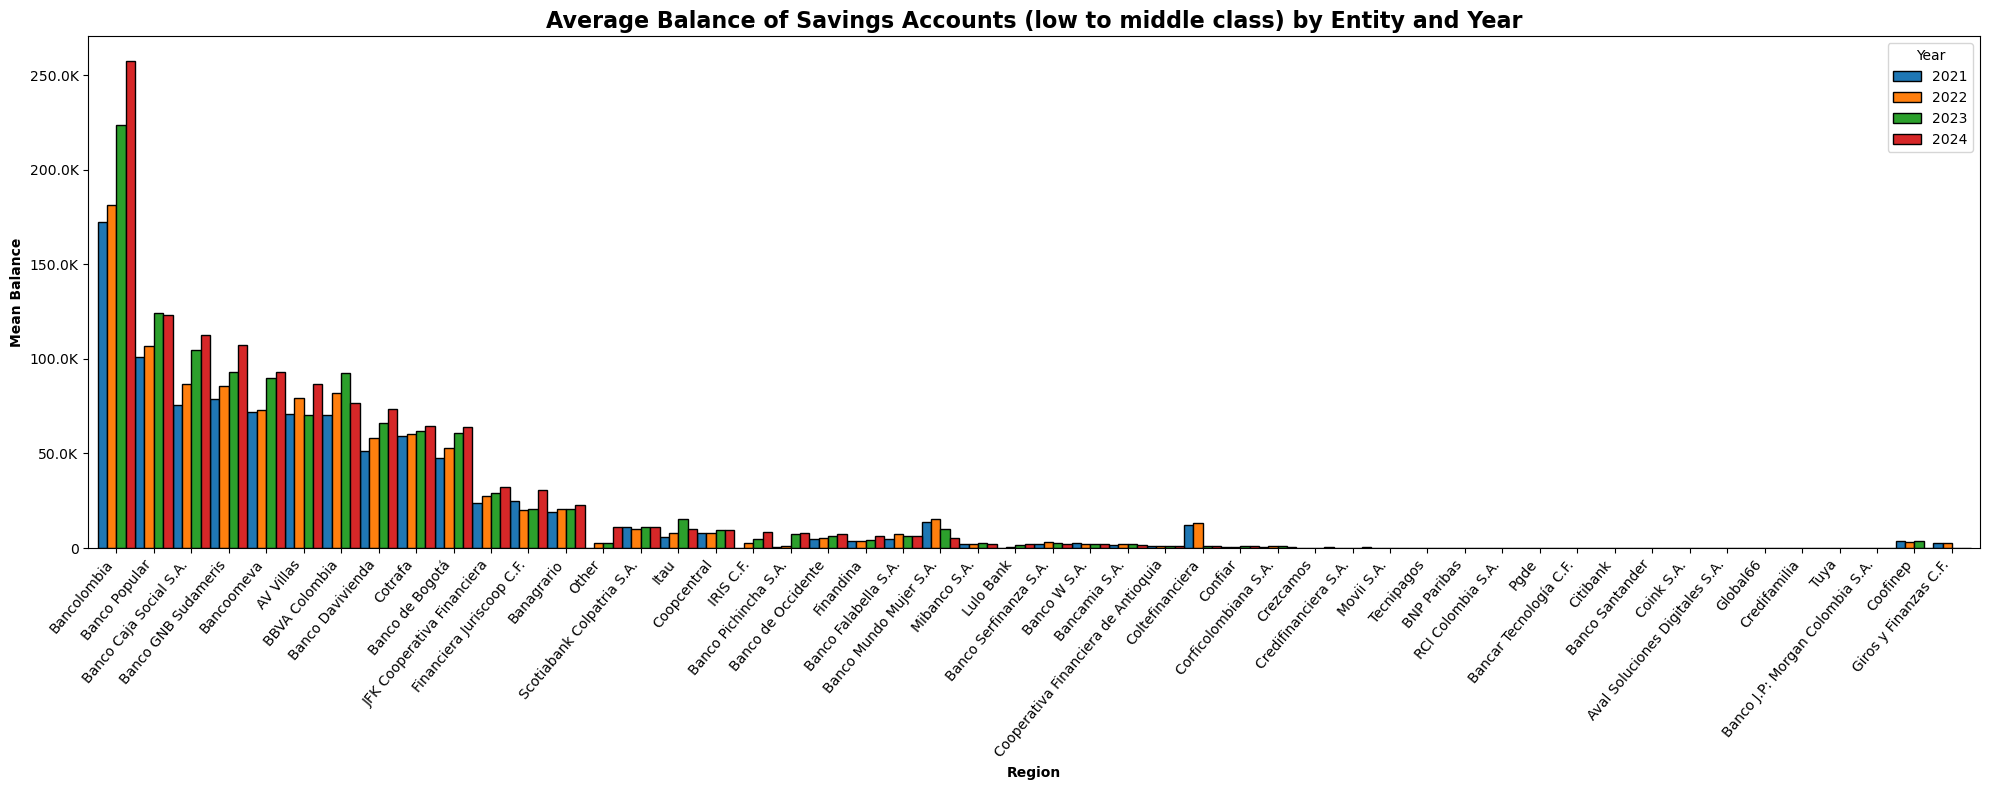

In [55]:
# Group the data and calculate the mean for the specified column
grouped = df_filtered.groupby(['entity_name', 'year'])[
    'balance_of_savings_accounts_greater_than_1_minimum_wage_up_to_3_minimum_wages_USD'
].mean()

# Pivot the grouped result so that each region is a row and each year is a column
pivoted = grouped.unstack(level='year')

# Sort by average balance
pivoted = pivoted.sort_values(by=2024, ascending=False)

# Plot the data as a grouped bar chart
ax = pivoted.plot(kind='bar', figsize=(20, 8), width=1, edgecolor='black')
# Explicitly set tick positions: one per region
ax.set_xticks(np.arange(len(pivoted.index)))
# Then set the tick labels to be the region names with rotation
ax.set_xticklabels(pivoted.index, rotation=45, ha='right')
# Apply the custom formatter to the y-axis
ax.yaxis.set_major_formatter(mticker.FuncFormatter(human_readable_format))
    

# Add titles and labels
plt.title("Average Balance of Savings Accounts (low to middle class) by Entity and Year", fontsize=16, fontweight='bold')
plt.xlabel("Region", fontweight='bold')
plt.ylabel("Mean Balance", fontweight='bold')
plt.xticks(rotation=50)
plt.legend(title="Year")
plt.tight_layout()
plt.show()

fig = ax.get_figure()
fig.savefig('average_savings_accounts_entity.png', dpi=300, bbox_inches='tight')

This graph focuses on the average savings account balances for low to middle class customers. 

For most entries, average balances tend to increase year over year. Which is a great sign of overall economic health. There aren't any sudden jumps overall either. 

Bancolombia has significantly larger mean balances than the rest and showed the greatest number of average balance gain over the 4 years. 

For most large banks, the growth across years is pretty consistent. Some smaller banks show little to no change year over year. 

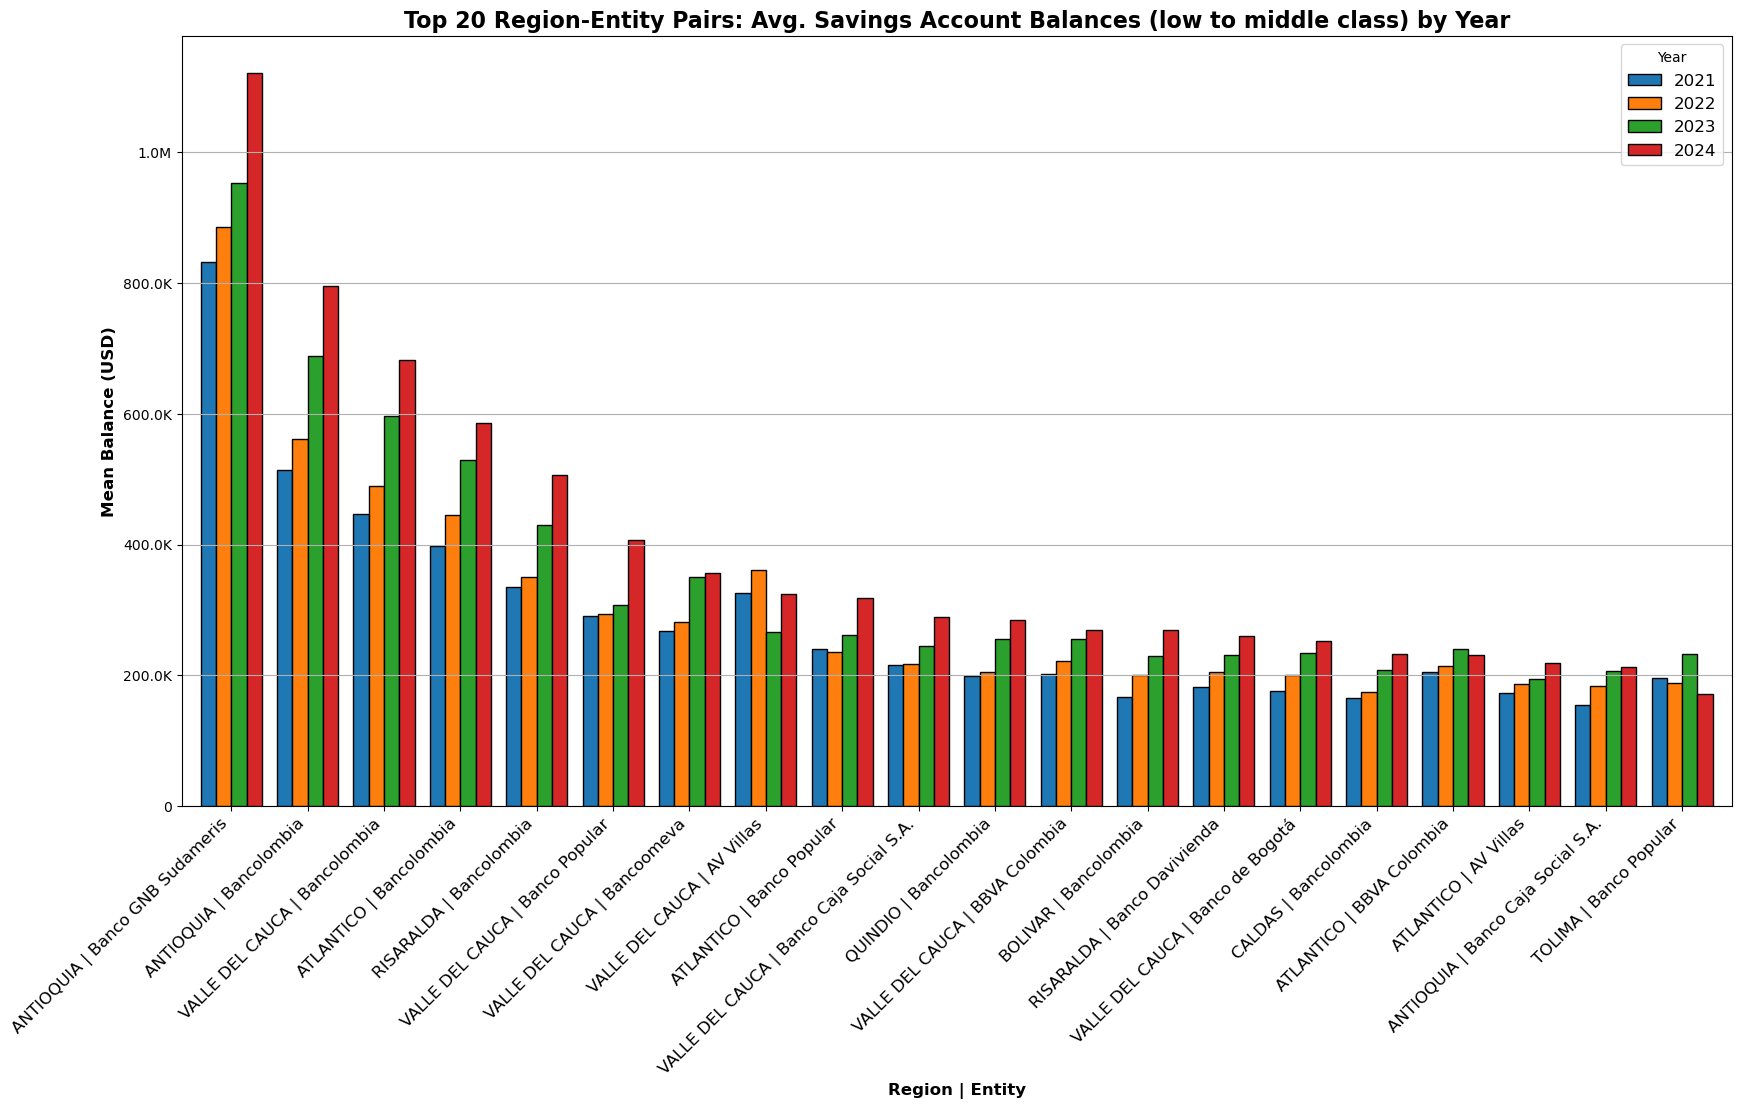

In [57]:
# Step 1: Drop TOTAL NACIONAL and BOGOTA
regions_to_drop = ['TOTAL NACIONAL', 'BOGOTA']
df_filtered = df[~df['region_description'].isin(regions_to_drop)]

# Step 2: Compute the mean per (region, entity) pair
top_pairs = (
    df_filtered.groupby(['region_description', 'entity_name'])[
        'balance_of_savings_accounts_greater_than_1_minimum_wage_up_to_3_minimum_wages_USD'
    ]
    .mean()
    .sort_values(ascending=False)
    .head(20)
    .index  # this gives you (region, entity) tuples
)

# Step 3: Filter the main DataFrame to include only those top 20 (region, entity) pairs
df_top_pairs = df_filtered.set_index(['region_description', 'entity_name'])
df_top_pairs = df_top_pairs.loc[top_pairs].reset_index()

# Step 4: Group again with year
grouped = df_top_pairs.groupby(['region_description', 'entity_name', 'year'])[
    'balance_of_savings_accounts_greater_than_1_minimum_wage_up_to_3_minimum_wages_USD'
].mean()

# Step 5: Pivot for plotting
pivoted = grouped.unstack(level='year')

# Sort by average balance
pivoted = pivoted.sort_values(by=2024, ascending=False)

# Step 6: Plot
ax = pivoted.plot(kind='bar', figsize=(20, 10), width=0.8, edgecolor='black')

# Custom x-axis labels
xtick_labels = [f"{region} | {entity}" for region, entity in pivoted.index]
ax.set_xticks(np.arange(len(xtick_labels)))
ax.set_xticklabels(xtick_labels, rotation=45, ha='right', fontsize=12)

# Format y-axis
ax.yaxis.set_major_formatter(mticker.FuncFormatter(human_readable_format))

# Titles and layout
plt.title("Top 20 Region-Entity Pairs: Avg. Savings Account Balances (low to middle class) by Year", fontsize=16, fontweight='bold')
plt.xlabel('Region | Entity', fontsize=12, fontweight='bold')
plt.ylabel('Mean Balance (USD)',fontsize=12, fontweight='bold')
plt.legend(title='Year', fontsize=12)
# plt.tight_layout()
plt.grid(axis='y')

# Save the figure
fig = ax.get_figure()
fig.savefig("top20_region_entity_avg_savings.png", dpi=300, bbox_inches="tight")
plt.show()

## Percent Change by Year

In [59]:
# Step 4: Group again with year and get the mean
grouped = df_top_pairs.groupby(['region_description', 'entity_name', 'year'])[
    'balance_of_savings_accounts_greater_than_1_minimum_wage_up_to_3_minimum_wages_USD'
].mean()

# Convert Series to DataFrame and reset index
grouped_df = grouped.to_frame(name='mean_balance_usd').reset_index()

# Format the mean balance values as dollars
grouped_df['mean_balance_usd'] = grouped_df['mean_balance_usd'].apply(
    lambda x: '${:,.2f}'.format(x)
)

In [60]:
grouped_df.head(20)

region_description             entity_name  year mean_balance_usd
0           ANTIOQUIA  Banco Caja Social S.A.  2021      $154,558.67
1           ANTIOQUIA  Banco Caja Social S.A.  2022      $183,120.11
2           ANTIOQUIA  Banco Caja Social S.A.  2023      $205,986.23
3           ANTIOQUIA  Banco Caja Social S.A.  2024      $212,937.37
4           ANTIOQUIA     Banco GNB Sudameris  2021      $831,729.36
5           ANTIOQUIA     Banco GNB Sudameris  2022      $885,582.80
6           ANTIOQUIA     Banco GNB Sudameris  2023      $952,906.35
7           ANTIOQUIA     Banco GNB Sudameris  2024    $1,121,810.25
8           ANTIOQUIA             Bancolombia  2021      $514,877.19
9           ANTIOQUIA             Bancolombia  2022      $560,986.03
10          ANTIOQUIA             Bancolombia  2023      $688,630.40
11          ANTIOQUIA             Bancolombia  2024      $795,577.78
12          ATLANTICO               AV Villas  2021      $173,429.10
13          ATLANTICO               AV Villas  2022      $187,306.05
14          ATLANTICO               AV Villas  2023      $194,619.21
15          ATLANTICO               AV Villas  2024      $218,283.11
16          ATLANTICO           BBVA Colombia  2021      $205,639.30
17          ATLANTICO           BBVA Colombia  2022      $214,893.94
18          ATLANTICO           BBVA Colombia  2023      $240,662.40
19          ATLANTICO           BBVA Colombia  2024      $231,803.21

In [61]:
# 1. Convert the dollar-formatted column to a numeric column
#    (e.g., from "$154,558.67" → 154558.67)
grouped_df['mean_balance_float'] = (
    grouped_df['mean_balance_usd']
    .str.replace('[\$,]', '', regex=True)  # remove $ and commas
    .astype(float)
)

# 2. Sort values to ensure computations go in ascending chronological order
grouped_df = grouped_df.sort_values(by=['region_description', 'entity_name', 'year'])

# 3. Calculate percent change within each (region, entity) group
grouped_df['pct_change'] = (
    grouped_df.groupby(['region_description', 'entity_name'])['mean_balance_float']
    .pct_change()   # computes (current - prev) / prev
    .mul(100)       # convert to percentage
)

# 4. (Optional) Format the pct_change column to display neatly as a string (e.g., "12.34%")
grouped_df['pct_change_str'] = grouped_df['pct_change'].apply(
    lambda x: f"{x:,.2f}%" if pd.notnull(x) else ""
)

In [62]:
grouped_df[['region_description', 'entity_name', 'year', 'mean_balance_usd', 'pct_change_str']].head(40)

region_description             entity_name  year mean_balance_usd  \
0           ANTIOQUIA  Banco Caja Social S.A.  2021      $154,558.67   
1           ANTIOQUIA  Banco Caja Social S.A.  2022      $183,120.11   
2           ANTIOQUIA  Banco Caja Social S.A.  2023      $205,986.23   
3           ANTIOQUIA  Banco Caja Social S.A.  2024      $212,937.37   
4           ANTIOQUIA     Banco GNB Sudameris  2021      $831,729.36   
5           ANTIOQUIA     Banco GNB Sudameris  2022      $885,582.80   
6           ANTIOQUIA     Banco GNB Sudameris  2023      $952,906.35   
7           ANTIOQUIA     Banco GNB Sudameris  2024    $1,121,810.25   
8           ANTIOQUIA             Bancolombia  2021      $514,877.19   
9           ANTIOQUIA             Bancolombia  2022      $560,986.03   
10          ANTIOQUIA             Bancolombia  2023      $688,630.40   
11          ANTIOQUIA             Bancolombia  2024      $795,577.78   
12          ATLANTICO               AV Villas  2021      $173,429.10   
13          ATLANTICO               AV Villas  2022      $187,306.05   
14          ATLANTICO               AV Villas  2023      $194,619.21   
15          ATLANTICO               AV Villas  2024      $218,283.11   
16          ATLANTICO           BBVA Colombia  2021      $205,639.30   
17          ATLANTICO           BBVA Colombia  2022      $214,893.94   
18          ATLANTICO           BBVA Colombia  2023      $240,662.40   
19          ATLANTICO           BBVA Colombia  2024      $231,803.21   
20          ATLANTICO           Banco Popular  2021      $239,861.22   
21          ATLANTICO           Banco Popular  2022      $236,424.05   
22          ATLANTICO           Banco Popular  2023      $261,406.35   
23          ATLANTICO           Banco Popular  2024      $318,576.73   
24          ATLANTICO             Bancolombia  2021      $397,909.44   
25          ATLANTICO             Bancolombia  2022      $445,968.93   
26          ATLANTICO             Bancolombia  2023      $530,007.96   
27          ATLANTICO             Bancolombia  2024      $586,162.08   
28            BOLIVAR             Bancolombia  2021      $166,916.08   
29            BOLIVAR             Bancolombia  2022      $200,242.03   
30            BOLIVAR             Bancolombia  2023      $229,238.82   
31            BOLIVAR             Bancolombia  2024      $269,261.24   
32             CALDAS             Bancolombia  2021      $165,776.02   
33             CALDAS             Bancolombia  2022      $173,917.72   
34             CALDAS             Bancolombia  2023      $207,775.04   
35             CALDAS             Bancolombia  2024      $233,179.44   
36            QUINDIO             Bancolombia  2021      $199,763.50   
37            QUINDIO             Bancolombia  2022      $205,150.88   
38            QUINDIO             Bancolombia  2023      $255,309.08   
39            QUINDIO             Bancolombia  2024      $284,159.33   

   pct_change_str  
0                  
1          18.48%  
2          12.49%  
3           3.37%  
4                  
5           6.47%  
6           7.60%  
7          17.73%  
8                  
9           8.96%  
10         22.75%  
11         15.53%  
12                 
13          8.00%  
14          3.90%  
15         12.16%  
16                 
17          4.50%  
18         11.99%  
19         -3.68%  
20                 
21         -1.43%  
22         10.57%  
23         21.87%  
24                 
25         12.08%  
26         18.84%  
27         10.59%  
28                 
29         19.97%  
30         14.48%  
31         17.46%  
32                 
33          4.91%  
34         19.47%  
35         12.23%  
36                 
37          2.70%  
38         24.45%  
39         11.30%

Here, we can see the percent change by year for the top region/entity pairs. 

# Middle to Upper Class Stats

In [65]:
exchange_rate = 4142
df['balance_of_savings_accounts_greater_than_3_minimum_wages_up_to_5_minimum_wages_USD'] = (df['balance_of_savings_accounts_greater_than_3_minimum_wages_up_to_5_minimum_wages'] / exchange_rate).round(2)

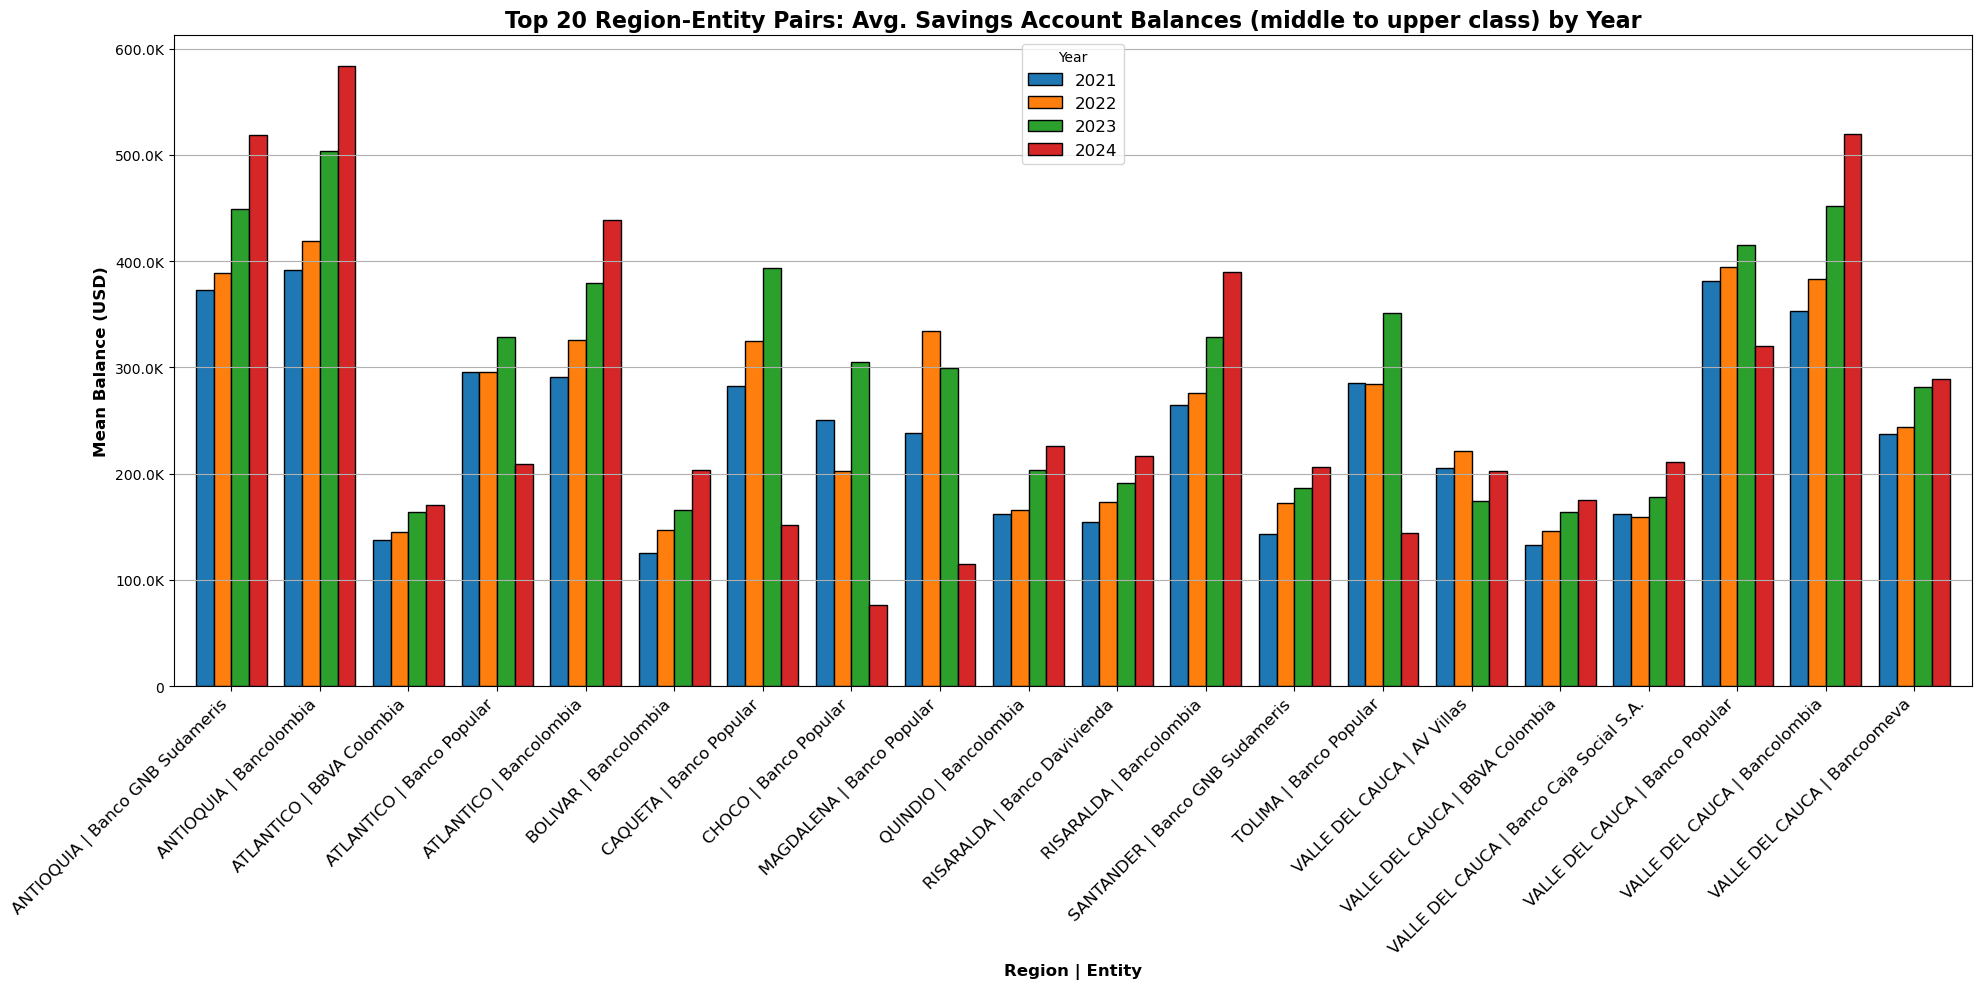

In [66]:
# Step 1: Drop TOTAL NACIONAL and BOGOTA
regions_to_drop = ['TOTAL NACIONAL', 'BOGOTA']
df_filtered = df[~df['region_description'].isin(regions_to_drop)]

# Step 2: Compute the mean per (region, entity) pair
top_pairs = (
    df_filtered.groupby(['region_description', 'entity_name'])[
        'balance_of_savings_accounts_greater_than_3_minimum_wages_up_to_5_minimum_wages_USD'
    ]
    .mean()
    .sort_values(ascending=False)
    .head(20)
    .index  # this gives you (region, entity) tuples
)

# Step 3: Filter the main DataFrame to include only those top 20 (region, entity) pairs
df_top_pairs = df_filtered.set_index(['region_description', 'entity_name'])
df_top_pairs = df_top_pairs.loc[top_pairs].reset_index()

# Step 4: Group again with year
grouped = df_top_pairs.groupby(['region_description', 'entity_name', 'year'])[
    'balance_of_savings_accounts_greater_than_3_minimum_wages_up_to_5_minimum_wages_USD'
].mean()

# Step 5: Pivot for plotting
pivoted = grouped.unstack(level='year')

# Step 6: Plot
ax = pivoted.plot(kind='bar', figsize=(20, 10), width=0.8, edgecolor='black')

# Custom x-axis labels
xtick_labels = [f"{region} | {entity}" for region, entity in pivoted.index]
ax.set_xticks(np.arange(len(xtick_labels)))
ax.set_xticklabels(xtick_labels, rotation=45, ha='right', fontsize=12)

# Format y-axis
ax.yaxis.set_major_formatter(mticker.FuncFormatter(human_readable_format))

# Titles and layout
plt.title("Top 20 Region-Entity Pairs: Avg. Savings Account Balances (middle to upper class) by Year", fontsize=16, fontweight='bold')
plt.xlabel('Region | Entity', fontsize=12, fontweight='bold')
plt.ylabel('Mean Balance (USD)',fontsize=12, fontweight='bold')
plt.legend(title='Year', fontsize=12)
plt.tight_layout()
plt.grid(axis='y')

# Save the figure
fig = ax.get_figure()
fig.savefig("top20_region_entity_avg_savings.png", dpi=300, bbox_inches="tight")
plt.show()


## Percent Change by Year

In [68]:
# Step 4: Group again with year and get the mean
grouped = df_top_pairs.groupby(['region_description', 'entity_name', 'year'])[
    'balance_of_savings_accounts_greater_than_3_minimum_wages_up_to_5_minimum_wages_USD'
].mean()

# Convert Series to DataFrame and reset index
grouped_df = grouped.to_frame(name='mean_balance_usd').reset_index()

# Format the mean balance values as dollars
grouped_df['mean_balance_usd'] = grouped_df['mean_balance_usd'].apply(
    lambda x: '${:,.2f}'.format(x)
)

In [69]:
# 1. Convert the dollar-formatted column to a numeric column
#    (e.g., from "$154,558.67" → 154558.67)
grouped_df['mean_balance_float'] = (
    grouped_df['mean_balance_usd']
    .str.replace('[\$,]', '', regex=True)  # remove $ and commas
    .astype(float)
)

# 2. Sort values to ensure computations go in ascending chronological order
grouped_df = grouped_df.sort_values(by=['region_description', 'entity_name', 'year'])

# 3. Calculate percent change within each (region, entity) group
grouped_df['pct_change'] = (
    grouped_df.groupby(['region_description', 'entity_name'])['mean_balance_float']
    .pct_change()   # computes (current - prev) / prev
    .mul(100)       # convert to percentage
)

# 4. (Optional) Format the pct_change column to display neatly as a string (e.g., "12.34%")
grouped_df['pct_change_str'] = grouped_df['pct_change'].apply(
    lambda x: f"{x:,.2f}%" if pd.notnull(x) else ""
)

In [70]:
grouped_df[['region_description', 'entity_name', 'year', 'mean_balance_usd', 'pct_change_str']].head(40)

region_description          entity_name  year mean_balance_usd  \
0           ANTIOQUIA  Banco GNB Sudameris  2021      $372,793.02   
1           ANTIOQUIA  Banco GNB Sudameris  2022      $388,748.26   
2           ANTIOQUIA  Banco GNB Sudameris  2023      $449,329.38   
3           ANTIOQUIA  Banco GNB Sudameris  2024      $519,054.67   
4           ANTIOQUIA          Bancolombia  2021      $391,891.33   
5           ANTIOQUIA          Bancolombia  2022      $419,162.18   
6           ANTIOQUIA          Bancolombia  2023      $503,520.93   
7           ANTIOQUIA          Bancolombia  2024      $583,239.01   
8           ATLANTICO        BBVA Colombia  2021      $137,633.79   
9           ATLANTICO        BBVA Colombia  2022      $145,426.96   
10          ATLANTICO        BBVA Colombia  2023      $164,110.56   
11          ATLANTICO        BBVA Colombia  2024      $170,263.94   
12          ATLANTICO        Banco Popular  2021      $295,252.07   
13          ATLANTICO        Banco Popular  2022      $295,507.55   
14          ATLANTICO        Banco Popular  2023      $328,596.01   
15          ATLANTICO        Banco Popular  2024      $208,832.34   
16          ATLANTICO          Bancolombia  2021      $291,320.40   
17          ATLANTICO          Bancolombia  2022      $325,802.81   
18          ATLANTICO          Bancolombia  2023      $379,431.11   
19          ATLANTICO          Bancolombia  2024      $438,149.53   
20            BOLIVAR          Bancolombia  2021      $125,267.08   
21            BOLIVAR          Bancolombia  2022      $147,051.62   
22            BOLIVAR          Bancolombia  2023      $165,740.80   
23            BOLIVAR          Bancolombia  2024      $202,908.96   
24            CAQUETA        Banco Popular  2021      $281,942.07   
25            CAQUETA        Banco Popular  2022      $324,832.83   
26            CAQUETA        Banco Popular  2023      $393,638.25   
27            CAQUETA        Banco Popular  2024      $151,809.06   
28              CHOCO        Banco Popular  2021      $250,871.20   
29              CHOCO        Banco Popular  2022      $202,580.77   
30              CHOCO        Banco Popular  2023      $305,255.57   
31              CHOCO        Banco Popular  2024       $76,574.50   
32          MAGDALENA        Banco Popular  2021      $238,146.21   
33          MAGDALENA        Banco Popular  2022      $334,341.79   
34          MAGDALENA        Banco Popular  2023      $298,977.37   
35          MAGDALENA        Banco Popular  2024      $114,663.88   
36            QUINDIO          Bancolombia  2021      $161,855.46   
37            QUINDIO          Bancolombia  2022      $165,666.93   
38            QUINDIO          Bancolombia  2023      $203,637.32   
39            QUINDIO          Bancolombia  2024      $225,561.54   

   pct_change_str  
0                  
1           4.28%  
2          15.58%  
3          15.52%  
4                  
5           6.96%  
6          20.13%  
7          15.83%  
8                  
9           5.66%  
10         12.85%  
11          3.75%  
12                 
13          0.09%  
14         11.20%  
15        -36.45%  
16                 
17         11.84%  
18         16.46%  
19         15.48%  
20                 
21         17.39%  
22         12.71%  
23         22.43%  
24                 
25         15.21%  
26         21.18%  
27        -61.43%  
28                 
29        -19.25%  
30         50.68%  
31        -74.91%  
32                 
33         40.39%  
34        -10.58%  
35        -61.65%  
36                 
37          2.35%  
38         22.92%  
39         10.77%

Here is the percent change in savings account balances per year for every region/bank combination.  This is a great way to see what regions and banks are increasing and what are decreasing. 

You can see some bank/entity combinations decreasing in savings account balances from one year to the next. Maybe some banks are offering better savings accounts than others and luring away customers, or maybe the region is experiencing some hardship that other regions aren't. 

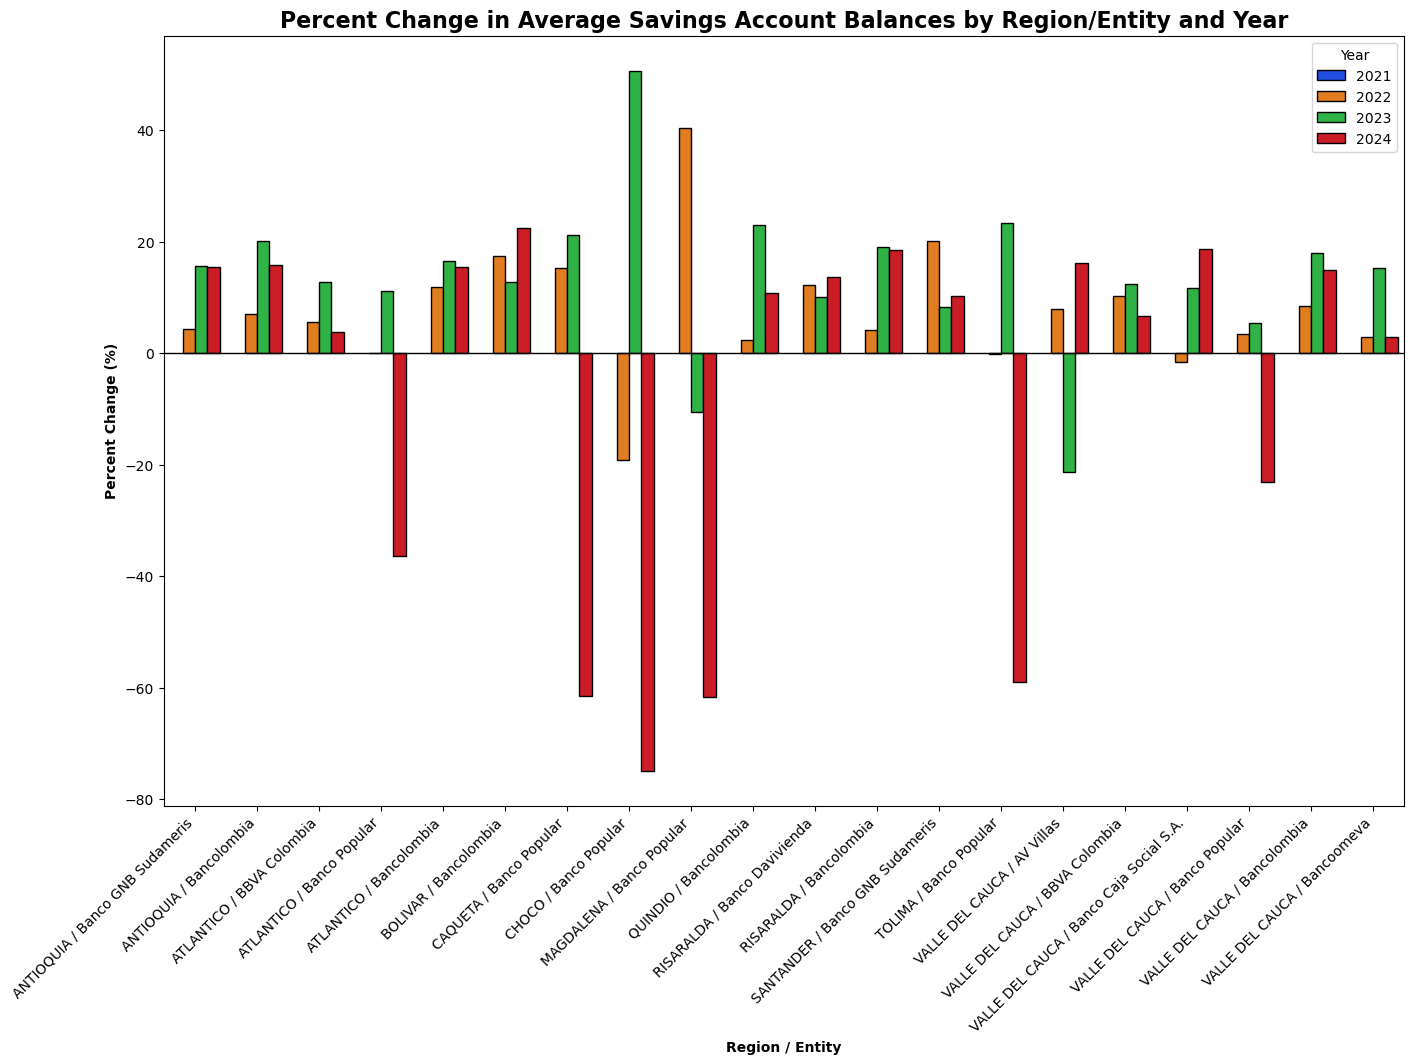

In [72]:
# Step 1: Create a combined label for region/entity
grouped_df['region_entity'] = grouped_df['region_description'] + " / " + grouped_df['entity_name']

# Step 2: Make the plot
plt.figure(figsize=(16, 10))

# Use seaborn barplot
sns.barplot(
    data=grouped_df,
    x='region_entity',
    y='pct_change',
    hue='year',
    palette='bright',
    edgecolor='black'
)

# Step 3: Beautify
plt.title('Percent Change in Average Savings Account Balances by Region/Entity and Year', fontsize=16, fontweight='bold')
plt.xlabel('Region / Entity', fontweight='bold')
plt.ylabel('Percent Change (%)', fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Optional: Add a horizontal line at 0
plt.axhline(0, color='black', linewidth=1)

plt.legend(title='Year')
plt.show()

Here is a visual representation of the percent change of total savings account balances by year. 

There are some significant leaps for Choco|Banco Popular and other regions with Banco Popular. Something significant happened with that bank. Maybe you could target the previous customers who took out money or switched from Banco Popular. 

# Small Consumer Loans

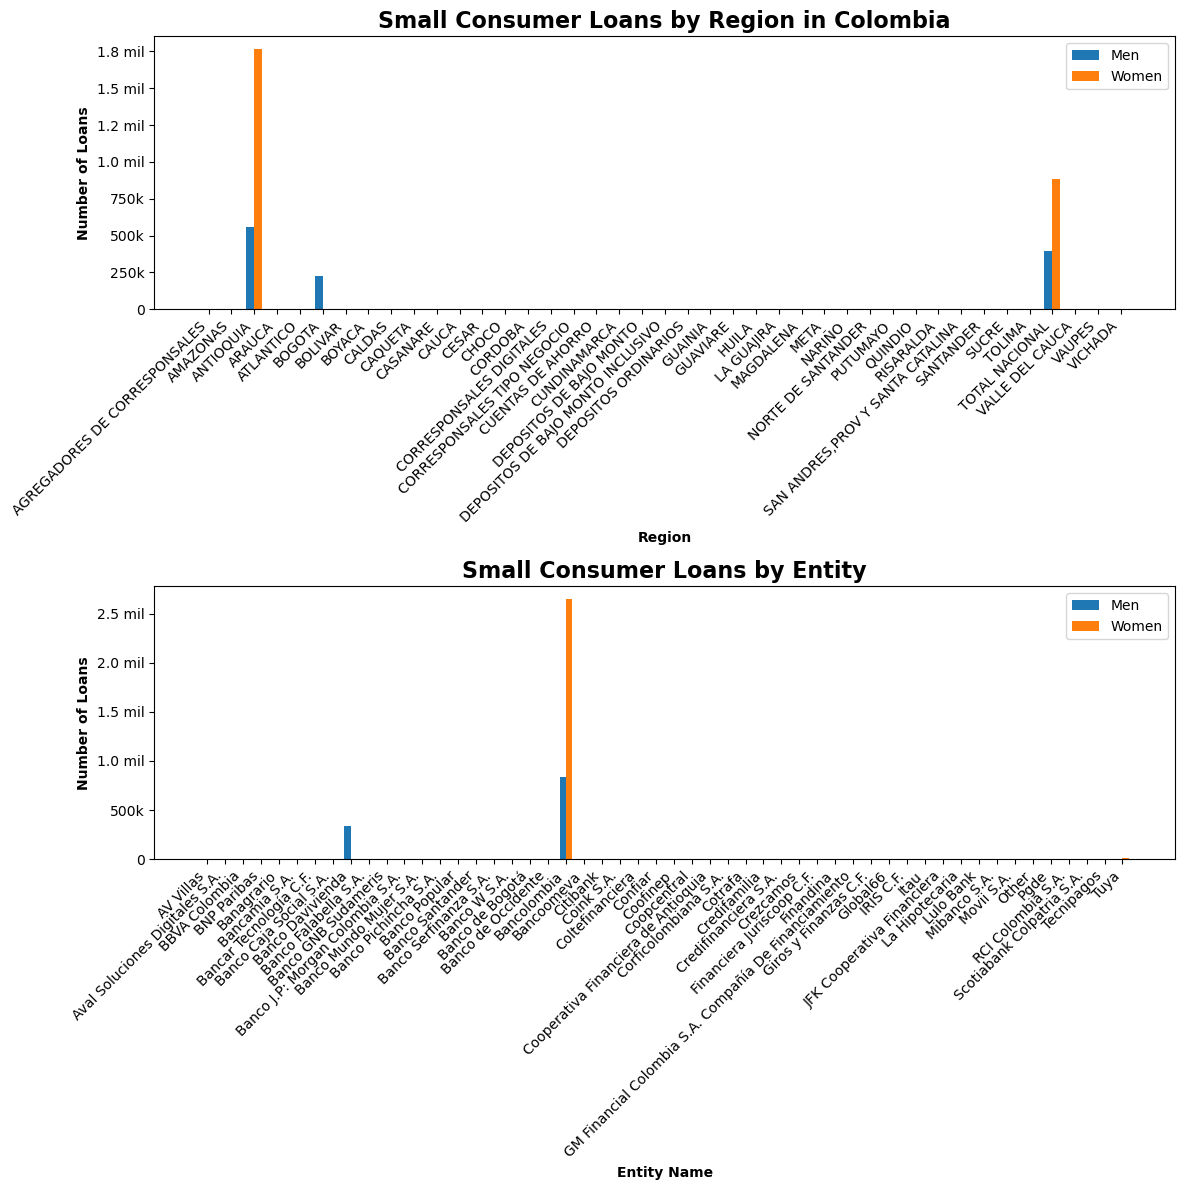

In [75]:
# Aggregate data by region
region_df = df.groupby('region_description').agg({
    'number_of_small_consumer_loans_men': 'sum',
    'number_of_small_consumer_loans_women': 'sum'
}).reset_index()

# Aggregate data by entity name
entity_df = df.groupby('entity_name').agg({
    'number_of_small_consumer_loans_men': 'sum',
    'number_of_small_consumer_loans_women': 'sum'
}).reset_index()

# Define a formatter function for the y-axis
def format_y_tick(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f} mil'
    elif x >= 1e3:
        return f'{x/1e3:.0f}k'
    else:
        return f'{x:.0f}'

# Set up the figure with two subplots vertically (stacked)
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
bar_width = 0.35

# ---- Plot for Regions (Top Plot) ----
regions = region_df['region_description']
men_loans = region_df['number_of_small_consumer_loans_men']
women_loans = region_df['number_of_small_consumer_loans_women']

x = range(len(regions))
axes[0].bar(x, men_loans, width=bar_width, label='Men')
axes[0].bar([p + bar_width for p in x], women_loans, width=bar_width, label='Women')

axes[0].set_xticks([p + bar_width / 2 for p in x])
axes[0].set_xticklabels(regions, rotation=45, ha='right')
axes[0].set_title('Small Consumer Loans by Region in Colombia', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Region', fontweight='bold')
axes[0].set_ylabel('Number of Loans', fontweight='bold')
axes[0].legend()
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(format_y_tick))

# ---- Plot for Entity Names (Bottom Plot) ----
entities = entity_df['entity_name']
men_loans_ent = entity_df['number_of_small_consumer_loans_men']
women_loans_ent = entity_df['number_of_small_consumer_loans_women']

x2 = range(len(entities))
axes[1].bar(x2, men_loans_ent, width=bar_width, label='Men')
axes[1].bar([p + bar_width for p in x2], women_loans_ent, width=bar_width, label='Women')

axes[1].set_xticks([p + bar_width / 2 for p in x2])
axes[1].set_xticklabels(entities, rotation=45, ha='right')
axes[1].set_title('Small Consumer Loans by Entity', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Entity Name', fontweight='bold')
axes[1].set_ylabel('Number of Loans', fontweight='bold')
axes[1].legend()
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(format_y_tick))

plt.tight_layout()
plt.show()

The number of small consumer loans are isolated by the region Antioquia and given out by the bank Bancolombia. Also, the majority of loans are given to women. 

This would be a good demographic to target loan offerings too. Women in Antiquia, which is where Medellin is located. It's one of the most populated cities. 

## Small Consumer Loan Amount 

In [78]:
df['total_small_consumer_loan_amount_women_USD'] = (df['total_small_consumer_loan_amount_women'] / exchange_rate).round(2)
df['total_small_consumer_loan_amount_men_USD'] = (df['total_small_consumer_loan_amount_men'] / exchange_rate).round(2)

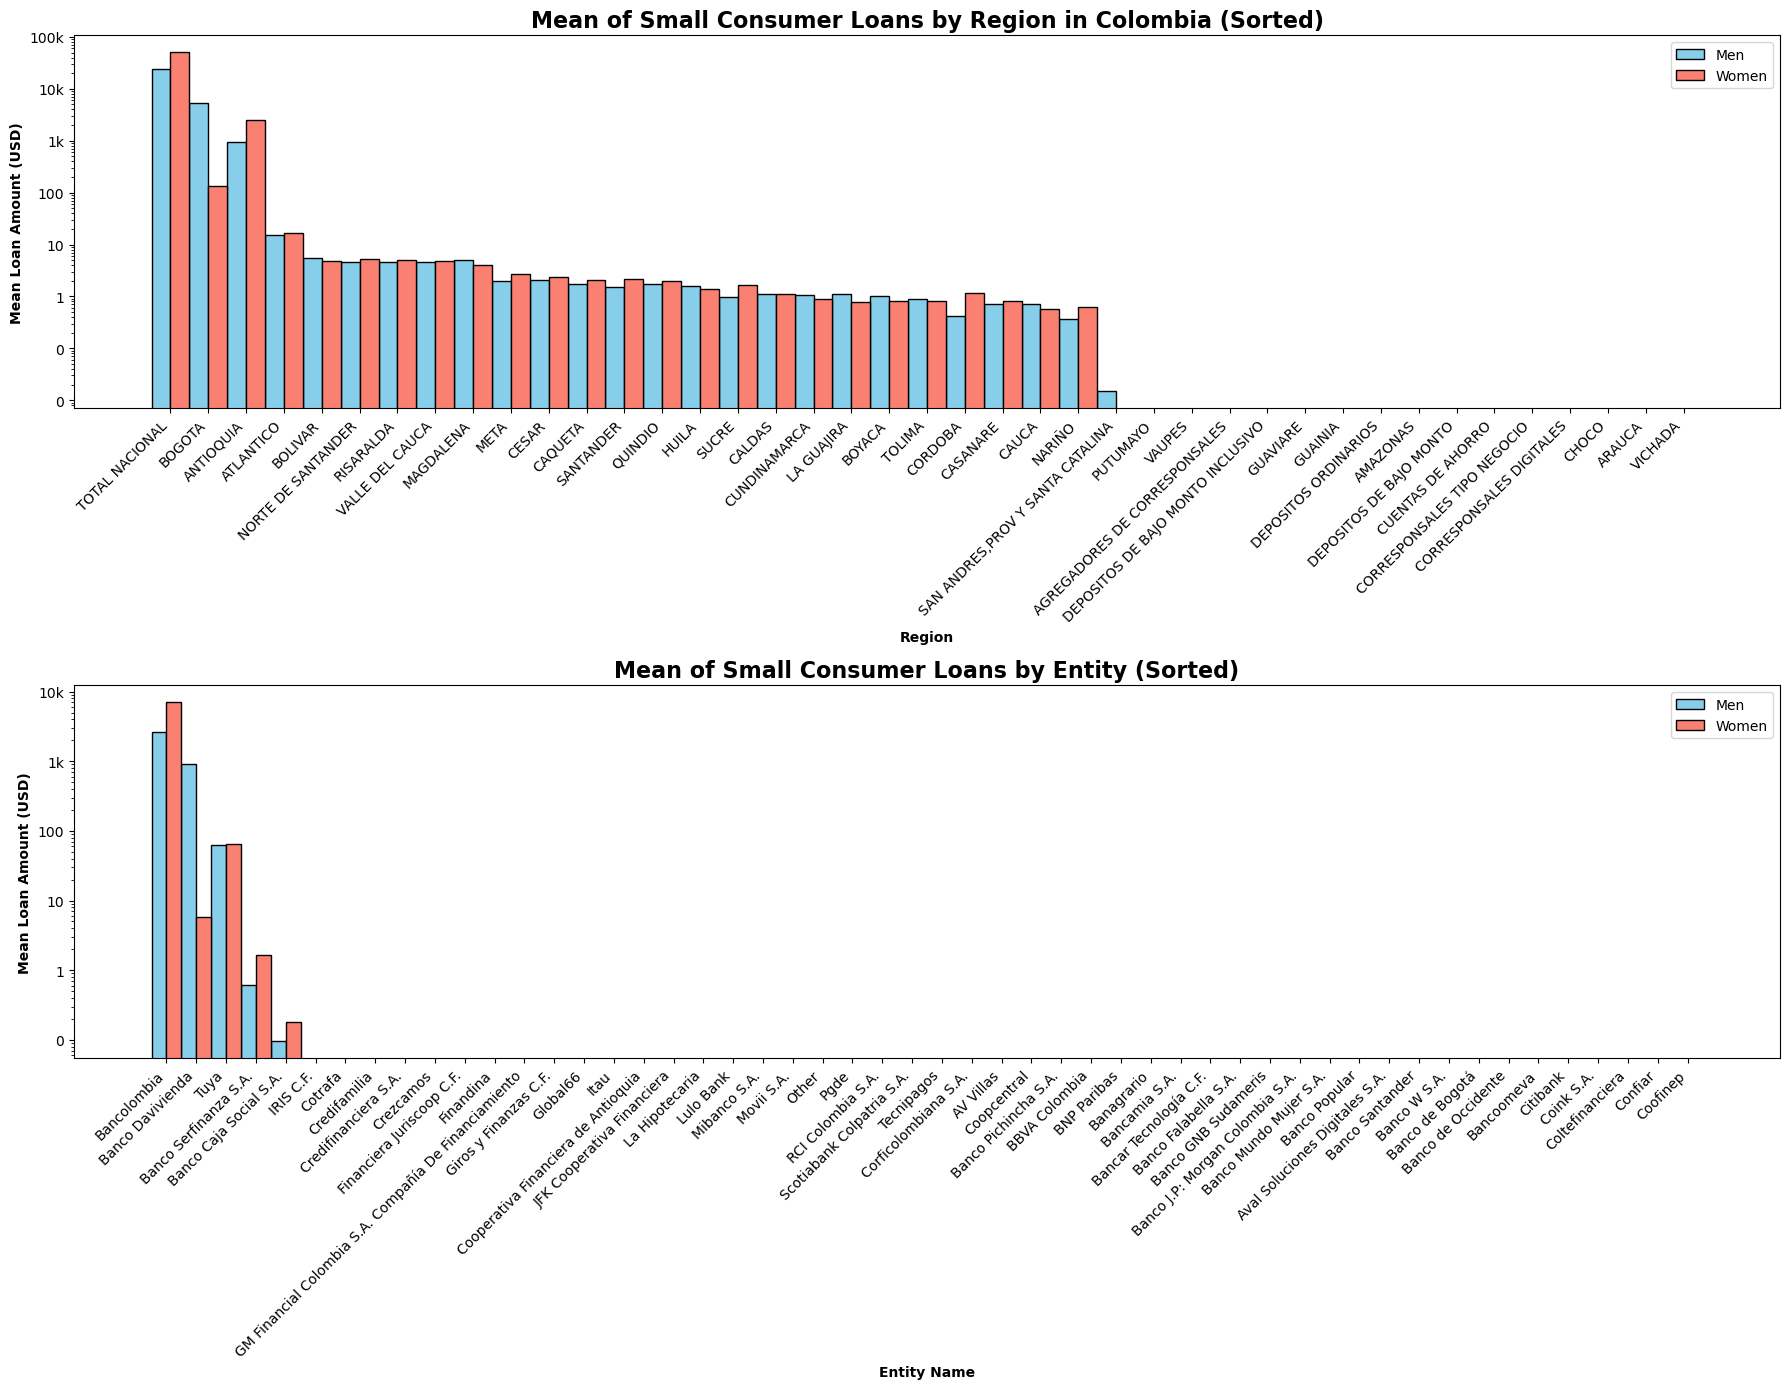

In [79]:
# Define the formatter
def format_y_tick(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f} mil'
    elif x >= 1e3:
        return f'{x/1e3:.0f}k'
    else:
        return f'{x:.0f}'

# Aggregate data
region_df = df.groupby('region_description').agg({
    'total_small_consumer_loan_amount_men_USD': 'mean',
    'total_small_consumer_loan_amount_women_USD': 'mean'
}).reset_index()

entity_df = df.groupby('entity_name').agg({
    'total_small_consumer_loan_amount_men_USD': 'mean',
    'total_small_consumer_loan_amount_women_USD': 'mean'
}).reset_index()

# ----------------------
# Sort by overall average
# ----------------------
region_df['mean_total'] = (region_df['total_small_consumer_loan_amount_men_USD'] + 
                           region_df['total_small_consumer_loan_amount_women_USD']) / 2
region_df = region_df.sort_values('mean_total', ascending=False)

entity_df['mean_total'] = (entity_df['total_small_consumer_loan_amount_men_USD'] + 
                           entity_df['total_small_consumer_loan_amount_women_USD']) / 2
entity_df = entity_df.sort_values('mean_total', ascending=False)

# ----------------------
# Set up plots
# ----------------------
fig, axes = plt.subplots(2, 1, figsize=(18, 14))  # Wider for better x-axis readability
bar_width = 0.5

# --- Plot for Regions ---
regions = region_df['region_description']
men_loans = region_df['total_small_consumer_loan_amount_men_USD']
women_loans = region_df['total_small_consumer_loan_amount_women_USD']

x = np.arange(len(regions))
axes[0].bar(x, men_loans, width=bar_width, label='Men', color='skyblue', edgecolor='black')
axes[0].bar(x + bar_width, women_loans, width=bar_width, label='Women', color='salmon', edgecolor='black')

axes[0].set_xticks(x + bar_width / 2)
axes[0].set_xticklabels(regions, rotation=45, ha='right')
axes[0].set_title('Mean of Small Consumer Loans by Region in Colombia (Sorted)', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Region', fontweight='bold')
axes[0].set_ylabel('Mean Loan Amount (USD)', fontweight='bold')
axes[0].legend()
axes[0].set_yscale('log')
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(format_y_tick))

# --- Plot for Entities ---
entities = entity_df['entity_name']
men_loans_ent = entity_df['total_small_consumer_loan_amount_men_USD']
women_loans_ent = entity_df['total_small_consumer_loan_amount_women_USD']

x2 = np.arange(len(entities))
axes[1].bar(x2, men_loans_ent, width=bar_width, label='Men', color='skyblue', edgecolor='black')
axes[1].bar(x2 + bar_width, women_loans_ent, width=bar_width, label='Women', color='salmon', edgecolor='black')

axes[1].set_xticks(x2 + bar_width / 2)
axes[1].set_xticklabels(entities, rotation=45, ha='right')
axes[1].set_title('Mean of Small Consumer Loans by Entity (Sorted)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Entity Name', fontweight='bold')
axes[1].set_ylabel('Mean Loan Amount (USD)', fontweight='bold')
axes[1].legend()
axes[1].set_yscale('log')
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(format_y_tick))
plt.tight_layout()
plt.show()

The mean of small consumer loans by region are all very similar if you take out the top 3. 

There is also very little differences in men and women in the smaller regions.

The biggest opportunity you can look for in this graph is in Bogota. There is a huge diparity between men and women. Men have a higher average small consumer loan balance than women. 

# **SUMMARY**

## Small Consumer Loans

Bogota and Antiquia dominate with the highest average loan amounts. 

Women (red bars) consistently have slightly higher average loan sizes the men (blue bars) across regions. 

The widest gap is in Bogota and Antiqua.

Bancolombia and Banco de Bogota lead the bank ranking. After the top few entries, average loan amounts drop sharply. 

Smaller banks show very low average balances, almost flattening near zero. 

Bancolombia shows a huge number of small consumer loans for women compared to men. 

The data shows that although a few key regions and financial entities dominate in terms of average loan size (e.g. Bancolombia, Banco de Bogotá), the total number of small consumer loans is even more skewed, with massive concentrations in specific areas like Bogota and specific banks.  

Across both loan amount and loan count metrics, Women often hold either more loans (in number).  

The loan market for small consumer loans is heavily concentrated both geographically and institutionally, with significant differences between large urban centers and smaller regions.

## Savings Account Balances (middle to upper class)

Most of the region entity pairs showed positive growth in average balances year over year. 

Banco Popular showed significant negative differences from 2023-2024 for many different regions. It shows this decline wasn't isolated to a specific region, but to a specific entity. 

Areas of decline can be an opportunity for financial product offerings. I would focus savings account products for customers who used to have savings accounts with Banco Popular. 

There seems to be some overall volatility too. We don't see a steadying increase in balances over time like you would expect. 

In general, there was steady growth in the average balances from 2021-2023 across most of the region/entity pairs. 2024 saw some drops and flatlining. 

The analysis of percent changes and average balances across region-entity pairs reveals strong growth trends from 2021 to 2023, especially among large banks in key regions.

However, in 2024, many region-entity pairs experienced a reversal, with significant declines in average savings account balances.

Overall, average balances are highest among a small group of region-entity pairs.

## Savings Account Balances (lower to middle class)

Most regions showed a steady year-over-year increase in savings account balances, with a notable rise from 2023 to 2024.

Regions like Antioquia, Atlántico, and Valle del Cauca consistently reported the highest average balances across all years.

In contrast, regions such as Guainía, Vaupés, and Vichada maintained low average balances throughout the period, suggesting potential disparities in financial access or economic conditions.

Financial institutions such as Bancolombia and Banco de Bogotá maintained the highest average balances across all four years.

The distribution of balances across entities is highly skewed, with a small number of institutions capturing the majority of savings, while many others show relatively low balances.

Balances within the top institutions showed consistent growth, particularly a strong increase in 2024.

Bancolombia dominated the savings accounts balances showing it dominance across all regions. 

Overall, savings balances for lower to middle class people are increasing steadily over the years. 

Growth is unevenly distributed, a few regions are significantly outperforming others. 

## Consumer Loans

Several smaller regions show much lower total loan counts, reinforcing geographic inequalities in access to consumer credit.

Overall, a concentration of lending is visible in a few key regions, with the majority of others trailing far behind.

The distribution for women is more spread out, with a wider range of loan counts — there are several regions/entities where women received more than 50,000 loans.

The distribution for men is more concentrated toward lower values, with relatively fewer cases exceeding 25,000 loans.

This indicates that women have greater access to small consumer loans overall compared to men, both in total volume and geographic/entity reach.



Small consumer loans are unevenly distributed across both regions and financial entities.

Women consistently receive a greater number of small consumer loans compared to men.

A small number of financial institutions and regions dominate loan distribution, while many others contribute very little.

The log scale highlights extreme differences between high-volume and low-volume lenders/regions that would otherwise be difficult to see on a linear scale.

This reinforces the idea that both geographic location and institutional relationships heavily influence access to small consumer credit, and that targeted policies may be needed to support more balanced financial inclusion.
